In [1]:
#importing libraries and reading the dataset
import pandas as pd
import numpy as np
import seaborn as sns
#1.importing the data
data3=pd.read_csv("Signal-data-1.csv")

In [2]:
#exploring the data
#data shape 
shape= data3.shape
print("The shape of the dataset is:",shape)

The shape of the dataset is: (1567, 592)


In [3]:
#Size of the data
size=data3.size
print("The size of the dataset is:",size)

The size of the dataset is: 927664


In [4]:
#head
data3.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,22-07-2008 11:47,3040.34,2501.16,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5481,...,NaN,0.4948,0.0117,0.0034,2.3737,0.0184,0.0151,0.0042,82.0989,NaN
1,22-07-2008 14:00,2988.30,2519.05,2208.8556,1157.7224,1.5509,100.0,107.8022,0.1233,1.5362,...,47.1586,0.5036,0.0169,0.0039,3.3514,0.0229,0.0108,0.0032,47.1586,NaN
2,22-07-2008 15:30,2987.32,2528.81,NaN,NaN,NaN,NaN,NaN,0.1195,1.6343,...,NaN,0.5011,0.0117,0.0033,2.3308,0.0229,0.0108,0.0032,47.1586,NaN
3,23-07-2008 05:15,NaN,2481.85,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5559,...,34.4153,0.4947,0.0137,0.0041,2.7729,0.0175,0.0060,0.0023,34.4153,NaN
4,23-07-2008 19:22,3002.27,2497.45,2207.3889,962.5317,1.2043,100.0,104.0311,0.1210,1.5465,...,114.5979,0.4977,0.0114,0.0037,2.2849,0.0250,0.0286,0.0075,114.5979,NaN


In [5]:
#tail
data3.tail()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
1562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


In [6]:
#datatypes of data
data3.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail    float64
Length: 592, dtype: object

In [7]:
#2.Data cleansing
#missing value treatement
data3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(591), object(1)
memory usage: 7.1+ MB


In [8]:
data3.isnull().sum()

Time         18
0            24
1            25
2            32
3            32
             ..
586          18
587          18
588          18
589          18
Pass/Fail    18
Length: 592, dtype: int64

From above, it is clearly evident that there are many missing values

In [9]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# Absence of a signal is assumed to be no signal in the dataset
# so better we not take median or mean and replace them with zeros
#dropping all nan values
data3.isnull().any().any()

True

In [10]:

data3 = data3.replace(np.NaN, 0)

In [11]:
data3.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [12]:
#Make all relevant modifications on the data using both functional/logical reasoning/assumptions
#Remove the highly collinear features from data
def removec(y, Threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        y: features dataframe
        Threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    cor_matrix = y.corr()
    iters = range(len(cor_matrix.columns) - 1)
    drop_col = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item1 = cor_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col1 = item1.columns
            row1 = item1.index
            val1 = abs(item1.values)

            # If correlation exceeds the threshold
            if val1 >= Threshold:
                # Print the correlated features and the correlation value
                print(col1.values[0], "|", row1.values[0], "|", round(val1[0][0], 2))
                drop_col.append(col1.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_col)
    y = y.drop(columns=drops)

    return y

In [13]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
data4 = removec(data3,0.70)

5 | 2 | 1.0
6 | 2 | 0.91
6 | 5 | 0.92
7 | 2 | 0.88
7 | 5 | 0.89
7 | 6 | 0.83
8 | 0 | 0.72
8 | 1 | 0.72
11 | 0 | 0.8
11 | 1 | 0.77
11 | 5 | 0.7
11 | 8 | 0.9
12 | 0 | 0.8
12 | 1 | 0.77
12 | 8 | 0.9
12 | 11 | 0.98
15 | 0 | 0.74
15 | 1 | 0.71
15 | 8 | 0.83
15 | 11 | 0.91
15 | 12 | 0.91
17 | 0 | 0.78
17 | 1 | 0.76
17 | 8 | 0.89
17 | 11 | 0.97
17 | 12 | 0.96
17 | 15 | 0.93
18 | 0 | 0.78
18 | 1 | 0.76
18 | 8 | 0.88
18 | 11 | 0.96
18 | 12 | 0.97
18 | 15 | 0.93
18 | 17 | 0.99
19 | 11 | 0.75
19 | 12 | 0.74
19 | 17 | 0.73
19 | 18 | 0.72
20 | 0 | 0.84
20 | 1 | 0.82
20 | 2 | 0.74
20 | 5 | 0.74
20 | 7 | 0.7
20 | 8 | 0.86
20 | 11 | 0.94
20 | 12 | 0.93
20 | 15 | 0.86
20 | 17 | 0.91
20 | 18 | 0.91
20 | 19 | 0.79
22 | 21 | 0.86
26 | 20 | 0.72
26 | 21 | 0.72
26 | 22 | 0.78
26 | 25 | 0.88
27 | 25 | 0.98
27 | 26 | 0.83
28 | 0 | 0.75
28 | 1 | 0.71
28 | 8 | 0.72
28 | 11 | 0.82
28 | 12 | 0.81
28 | 15 | 0.75
28 | 17 | 0.8
28 | 18 | 0.79
28 | 19 | 0.7
28 | 20 | 0.87
28 | 26 | 0.75
30 | 29 | 0.9
31 | 21 | 0.78
3

83 | 0 | 0.7
83 | 8 | 0.71
83 | 11 | 0.78
83 | 12 | 0.77
83 | 15 | 0.73
83 | 17 | 0.76
83 | 18 | 0.76
83 | 20 | 0.82
83 | 28 | 0.74
83 | 32 | 0.78
83 | 34 | 0.79
83 | 35 | 0.76
83 | 36 | 0.79
83 | 37 | 0.8
83 | 38 | 0.8
83 | 39 | 0.8
83 | 42 | 0.8
83 | 43 | 0.79
83 | 44 | 0.79
83 | 45 | 0.7
83 | 46 | 0.79
83 | 48 | 0.77
83 | 49 | 0.8
83 | 50 | 0.79
83 | 53 | 0.74
83 | 54 | 0.74
83 | 55 | 0.74
83 | 56 | 0.74
83 | 57 | 0.74
83 | 58 | 0.73
83 | 60 | 0.71
83 | 61 | 0.71
83 | 66 | 0.71
83 | 68 | 0.71
83 | 69 | 0.72
83 | 70 | 0.71
84 | 11 | 0.7
84 | 20 | 0.74
84 | 32 | 0.71
84 | 34 | 0.7
84 | 36 | 0.71
84 | 37 | 0.72
84 | 38 | 0.72
84 | 39 | 0.71
84 | 42 | 0.72
84 | 43 | 0.71
84 | 44 | 0.72
84 | 46 | 0.71
84 | 49 | 0.72
84 | 50 | 0.71
86 | 0 | 0.84
86 | 1 | 0.81
86 | 2 | 0.74
86 | 5 | 0.74
86 | 7 | 0.7
86 | 8 | 0.85
86 | 11 | 0.93
86 | 12 | 0.93
86 | 15 | 0.86
86 | 17 | 0.91
86 | 18 | 0.91
86 | 19 | 0.79
86 | 20 | 0.98
86 | 26 | 0.73
86 | 28 | 0.86
86 | 32 | 0.94
86 | 34 | 0.94
86 | 35 | 0.9

147 | 16 | 0.83
148 | 16 | 0.9
148 | 147 | 0.89
152 | 16 | 0.89
152 | 147 | 0.89
152 | 148 | 0.99
154 | 16 | 0.85
154 | 147 | 0.8
154 | 148 | 0.94
154 | 152 | 0.88
163 | 159 | 0.75
164 | 159 | 0.79
164 | 163 | 0.91
165 | 159 | 0.78
165 | 163 | 0.88
165 | 164 | 0.96
174 | 172 | 1.0
185 | 184 | 0.71
187 | 185 | 0.83
196 | 67 | 0.86
197 | 67 | 0.84
197 | 196 | 0.89
198 | 196 | 0.71
198 | 197 | 0.73
199 | 67 | 0.81
199 | 196 | 0.94
199 | 197 | 0.83
199 | 198 | 0.72
202 | 74 | 0.83
202 | 196 | 0.7
202 | 201 | 0.8
203 | 196 | 0.81
203 | 197 | 0.72
203 | 199 | 0.8
203 | 200 | 0.77
203 | 202 | 0.84
204 | 67 | 0.9
204 | 196 | 0.87
204 | 197 | 0.8
204 | 199 | 0.82
204 | 203 | 0.78
205 | 67 | 0.87
205 | 196 | 0.86
205 | 197 | 0.84
205 | 198 | 0.71
205 | 199 | 0.81
205 | 204 | 0.83
206 | 74 | 1.0
206 | 202 | 0.83
207 | 67 | 0.85
207 | 196 | 0.92
207 | 197 | 0.88
207 | 199 | 0.88
207 | 200 | 0.72
207 | 203 | 0.86
207 | 204 | 0.86
207 | 205 | 0.87
209 | 74 | 1.0
209 | 202 | 0.83
209 | 206 | 1.0
220 

452 | 180 | 1.0
452 | 316 | 0.9
453 | 181 | 1.0
453 | 317 | 0.96
454 | 182 | 0.99
454 | 318 | 0.97
455 | 183 | 1.0
455 | 319 | 0.98
456 | 184 | 0.97
456 | 185 | 0.72
456 | 320 | 0.96
456 | 321 | 0.72
457 | 185 | 1.0
457 | 187 | 0.81
457 | 320 | 0.71
457 | 321 | 0.99
457 | 323 | 0.8
457 | 456 | 0.71
459 | 185 | 0.82
459 | 187 | 1.0
459 | 321 | 0.82
459 | 323 | 0.99
459 | 457 | 0.81
467 | 195 | 1.0
467 | 331 | 0.95
469 | 67 | 0.85
469 | 196 | 0.89
469 | 197 | 1.0
469 | 198 | 0.73
469 | 199 | 0.83
469 | 203 | 0.72
469 | 204 | 0.79
469 | 205 | 0.85
469 | 207 | 0.88
469 | 332 | 0.9
469 | 333 | 0.99
469 | 334 | 0.78
469 | 335 | 0.87
469 | 336 | 0.91
469 | 340 | 0.81
469 | 341 | 0.86
469 | 343 | 0.89
470 | 197 | 0.71
470 | 198 | 1.0
470 | 199 | 0.7
470 | 333 | 0.72
470 | 334 | 0.98
470 | 341 | 0.7
470 | 469 | 0.7
471 | 196 | 0.83
471 | 199 | 0.94
471 | 202 | 0.74
471 | 203 | 0.81
471 | 204 | 0.73
471 | 207 | 0.75
471 | 332 | 0.72
471 | 335 | 0.83
471 | 336 | 0.73
471 | 337 | 0.71
471 | 338 | 

In [14]:
# deleting the first column

data4 = data4.drop(columns = ['Time'], axis = 1)


In [15]:
data4.drop(data4.index[data4['Pass/Fail'] == 0.0], inplace = True)

In [16]:

data4.shape

(1549, 273)

In [17]:
#3. Data analysis and visualization
#perform detailed relevant statistical analysis
#mean
print("Data mean:",data4.mean())
#median
print("Data Median:",data4.median())
#data quantile (25%)
print("Data quantile(25%):",data4.quantile(q=0.25)) 
#data quantile (50%)
print("Data quantile(50%):",data4.quantile(q=0.50)) 
#data quantile (75%)
print("Data quantile(75%):",data4.quantile(q=0.75))  


Data mean: 0            2970.033854
1            2455.067424
2            2156.200679
3            1373.349371
4               4.179609
                ...     
583             0.014837
586             0.021204
587             0.016201
589            98.374348
Pass/Fail      -0.870884
Length: 273, dtype: float64
Data Median: 0            3010.3000
1            2497.5600
2            2200.2111
3            1283.3701
4               1.3076
               ...    
583             0.0137
586             0.0203
587             0.0146
589            71.0108
Pass/Fail      -1.0000
Length: 273, dtype: float64
Data quantile(25%): 0            2964.6300
1            2449.2600
2            2179.7333
3            1078.7860
4               0.9830
               ...    
583             0.0115
586             0.0132
587             0.0104
589            43.5231
Pass/Fail      -1.0000
Name: 0.25, Length: 273, dtype: float64
Data quantile(50%): 0            3010.3000
1            2497.5600
2            

In [18]:
#correlation
data4.corr()

,0,1,2,3,4,9,10,13,14,16,...,559,562,571,572,578,583,586,587,589,Pass/Fail
0,1.000000,0.695473,0.656966,0.267935,0.006171,0.000667,-0.006387,NaN,0.258496,0.343117,...,0.169409,0.206024,0.538788,0.039381,0.043327,0.121823,0.181701,0.168276,0.105553,-0.000623
1,0.695473,1.000000,0.608249,0.258751,0.007972,-0.003138,0.018119,NaN,0.274520,0.326708,...,0.133608,0.198541,0.506561,0.037282,0.063805,0.105768,0.145704,0.182949,0.117379,0.039831
2,0.656966,0.608249,1.000000,0.432326,0.019747,-0.044376,0.010096,NaN,0.239810,0.302821,...,0.149733,0.146090,0.499565,0.040573,0.078964,0.085736,0.149486,0.140302,0.062003,0.026828
3,0.267935,0.258751,0.432326,1.000000,-0.049945,0.042224,0.046469,NaN,0.084366,0.115286,...,0.085460,0.143311,0.194494,0.022917,0.093490,0.068153,0.089301,0.021853,-0.046024,-0.021670
4,0.006171,0.007972,0.019747,-0.049945,1.000000,0.054527,-0.006490,NaN,-0.013246,0.001960,...,-0.025291,0.027719,-0.058083,-0.011783,0.010108,0.000319,-0.041886,-0.028818,0.051568,0.090329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.121823,0.105768,0.085736,0.068153,0.000319,-0.049183,0.074753,NaN,0.034515,0.049163,...,0.068491,0.023457,0.090773,-0.013337,0.043096,1.000000,0.025424,0.023347,0.017569,-0.024447
586,0.181701,0.145704,0.149486,0.089301,-0.041886,0.030048,-0.001665,NaN,0.001982,0.023711,...,0.021386,0.073884,0.073160,-0.001812,0.351138,0.025424,1.000000,0.191164,-0.454577,-0.042680
587,0.168276,0.182949,0.140302,0.021853,-0.028818,0.052277,0.046159,NaN,0.107618,0.105407,...,0.024370,0.057334,0.112797,0.007092,0.123224,0.023347,0.191164,1.000000,0.404801,0.034690
589,0.105553,0.117379,0.062003,-0.046024,0.051568,0.004476,0.010510,NaN,0.102366,0.034738,...,0.035818,0.047198,0.078267,-0.018261,-0.162928,0.017569,-0.454577,0.404801,1.000000,0.075267


In [19]:
data4.isnull().sum()

0            0
1            0
2            0
3            0
4            0
            ..
583          0
586          0
587          0
589          0
Pass/Fail    0
Length: 273, dtype: int64

In [20]:
data4.isnull().any().any()

False

In [21]:
data4 = data4.replace(np.NaN, 0)


In [22]:
#covariance
data4.cov()

,0,1,2,3,4,9,10,13,14,16,...,559,562,571,572,578,583,586,587,589,Pass/Fail
0,138448.137104,83993.080519,75683.154651,48007.791563,129.571234,0.003707,-2.191195e-02,0.0,285.041276,341.249284,...,12.748232,7771.168406,71.343045,1268.557514,0.206087,0.578011,0.848250,0.557300,3717.669256,-0.114038
1,83993.080519,105351.225111,61124.331062,40442.774772,146.005802,-0.015219,5.422691e-02,0.0,264.060408,283.442708,...,8.770439,6532.736984,58.511540,1047.618681,0.264739,0.437760,0.593352,0.528535,3606.344146,6.356147
2,75683.154651,61124.331062,95857.369404,64456.001427,345.008656,-0.205298,2.882134e-02,0.0,220.034056,250.602077,...,9.375589,4585.193859,55.042134,1087.523476,0.312526,0.338484,0.580678,0.386634,1817.107141,4.083662
3,48007.791563,40442.774772,64456.001427,231887.776123,-1357.185957,0.303823,2.063245e-01,0.0,120.396481,148.388393,...,8.322852,6995.905037,33.330062,955.378844,0.575504,0.418490,0.539531,0.093663,-2097.859300,-5.130330
4,129.571234,146.005802,345.008656,-1357.185957,3184.308385,0.045977,-3.376591e-03,0.0,-2.215073,0.295702,...,-0.288630,158.564705,-1.166393,-57.563567,0.007291,0.000230,-0.029655,-0.014474,275.451397,2.506039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.578011,0.437760,0.338484,0.418490,0.000230,-0.000009,8.788989e-06,0.0,0.001304,0.001676,...,0.000177,0.030323,0.000412,-0.014724,0.000007,0.000163,0.000004,0.000003,0.021206,-0.000153
586,0.848250,0.593352,0.580678,0.539531,-0.029655,0.000006,-1.926256e-07,0.0,0.000074,0.000795,...,0.000054,0.093972,0.000327,-0.001968,0.000056,0.000004,0.000157,0.000021,-0.539866,-0.000263
587,0.557300,0.528535,0.386634,0.093663,-0.014474,0.000007,3.788147e-06,0.0,0.002839,0.002508,...,0.000044,0.051732,0.000357,0.005465,0.000014,0.000003,0.000021,0.000079,0.341052,0.000152
589,3717.669256,3606.344146,1817.107141,-2097.859300,275.451397,0.006332,9.172538e-03,0.0,28.715995,8.789258,...,0.685687,452.900089,2.636479,-149.643683,-0.197150,0.021206,-0.539866,0.341052,8960.093615,3.502801


In [23]:
#describe function
data4.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1549.0,2970.033854,372.086196,0.0000,2964.6300,3010.3000,3056.5800,3356.3500
1,1549.0,2455.067424,324.578535,0.0000,2449.2600,2497.5600,2538.3800,2846.4400
2,1549.0,2156.200679,309.608413,0.0000,2179.7333,2200.2111,2217.8111,2315.2667
3,1549.0,1373.349371,481.547273,0.0000,1078.7860,1283.3701,1590.2597,3715.0417
4,1549.0,4.179609,56.429676,0.0000,0.9830,1.3076,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
583,1549.0,0.014837,0.012752,0.0000,0.0115,0.0137,0.0164,0.4714
586,1549.0,0.021204,0.012546,-0.0169,0.0132,0.0203,0.0275,0.1028
587,1549.0,0.016201,0.008901,0.0000,0.0104,0.0146,0.0203,0.0799
589,1549.0,98.374348,94.657771,0.0000,43.5231,71.0108,114.2878,737.3048


The above output represents the mean, median, count, std, max, min values of all the attributes

In [24]:
#variance
print('variance:',data4.var())

variance: 0            138448.137104
1            105351.225111
2             95857.369404
3            231887.776123
4              3184.308385
                 ...      
583               0.000163
586               0.000157
587               0.000079
589            8960.093615
Pass/Fail         0.241716
Length: 273, dtype: float64


In [25]:
#standard deviation
print('std:',data4.std())

std: 0            372.086196
1            324.578535
2            309.608413
3            481.547273
4             56.429676
                ...    
583            0.012752
586            0.012546
587            0.008901
589           94.657771
Pass/Fail      0.491647
Length: 273, dtype: float64


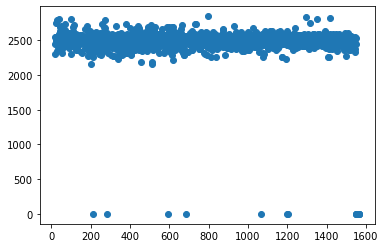

In [26]:
#Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
#univariate analysis
#scatter plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data4.index,data4['1']) # scatter plot for continuous data
plt.show()


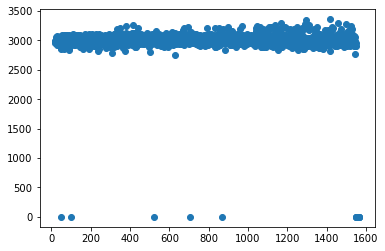

In [27]:
plt.scatter(data4.index,data4['0']) # scatter plot for continuous data
plt.show()


From the above 2 graphs it is clearly evident that the values of the data for the attribute '0' are mostly between 3000 to 3500.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3', ylabel='count'>

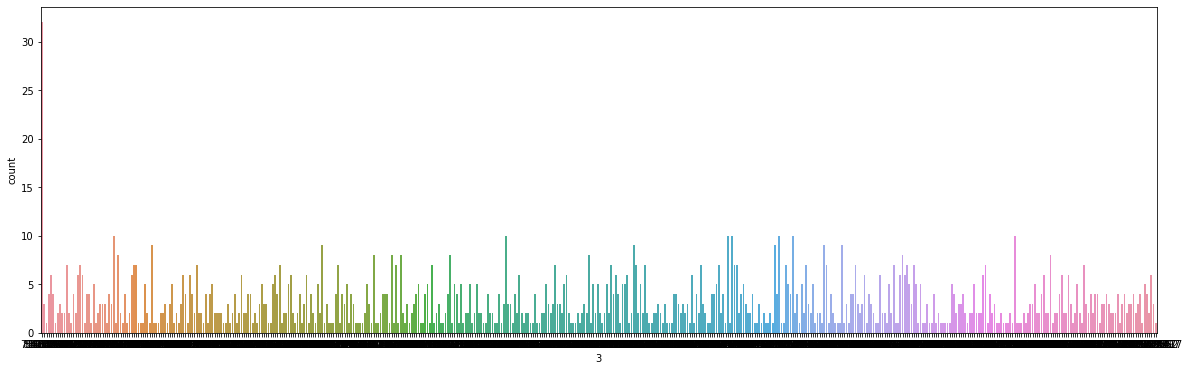

In [28]:
#Count plot
import seaborn as sns
plt.figure(figsize=(20,6))
sns.countplot(data4['3'])

(array([ 23.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 838., 688.]),
 array([   0.   ,  335.635,  671.27 , 1006.905, 1342.54 , 1678.175,
        2013.81 , 2349.445, 2685.08 , 3020.715, 3356.35 ]),
 <BarContainer object of 10 artists>)

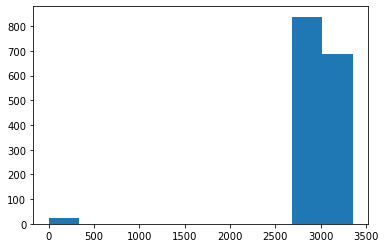

In [29]:
#histogram
plt.hist(x=data4['0'])

The above histogram depicts the distribution of '0' data points.


<AxesSubplot:xlabel='10'>

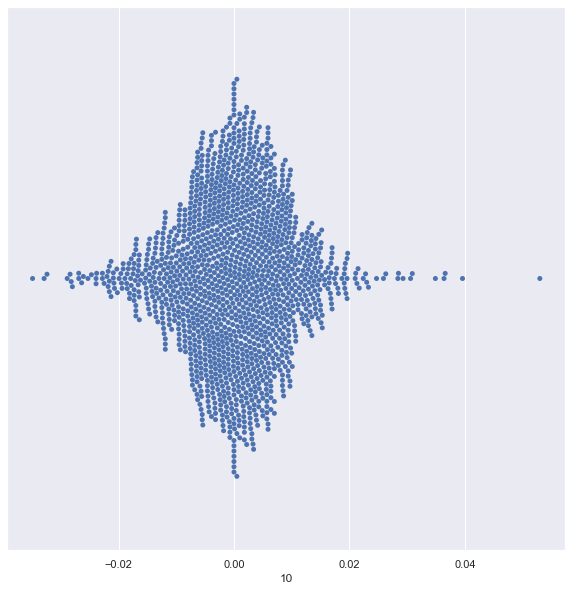

In [30]:
sns.set(rc={'figure.figsize':(10,10)})
sns.swarmplot(x=data4['10'])


<AxesSubplot:ylabel='Density'>

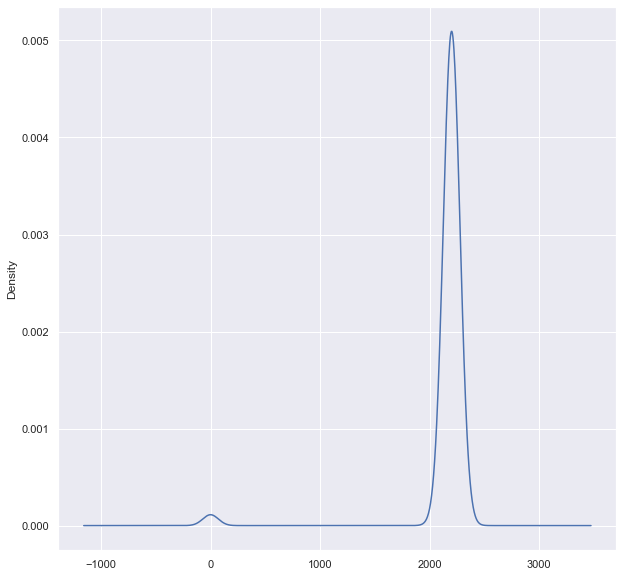

In [31]:
#density plot
plt.figure(figsize=(10,10))
data4['2'].plot(kind='density')

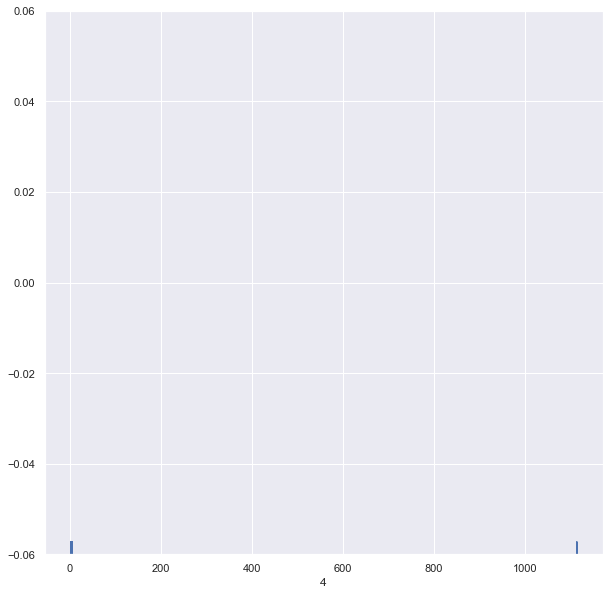

In [32]:
#rug plot
fig,ax=plt.subplots()
sns.rugplot(data4['4'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5938ef2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5938ef9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5938e1f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5938fc070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5938fc3a0>],
 'means': []}

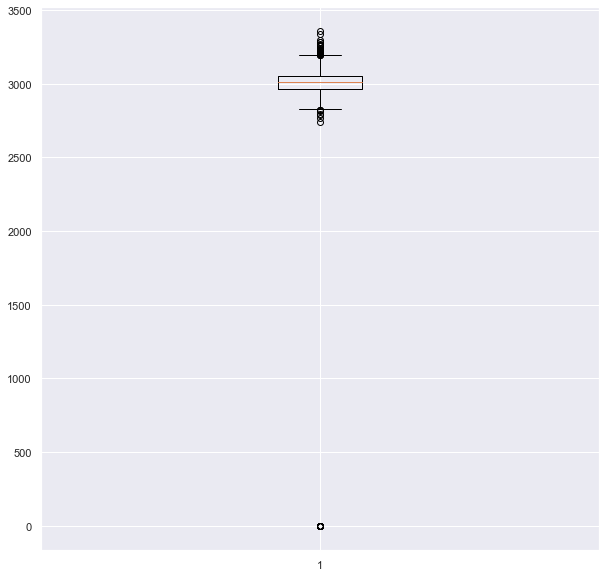

In [33]:
#box plot
plt.boxplot(data4['0'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='2'>

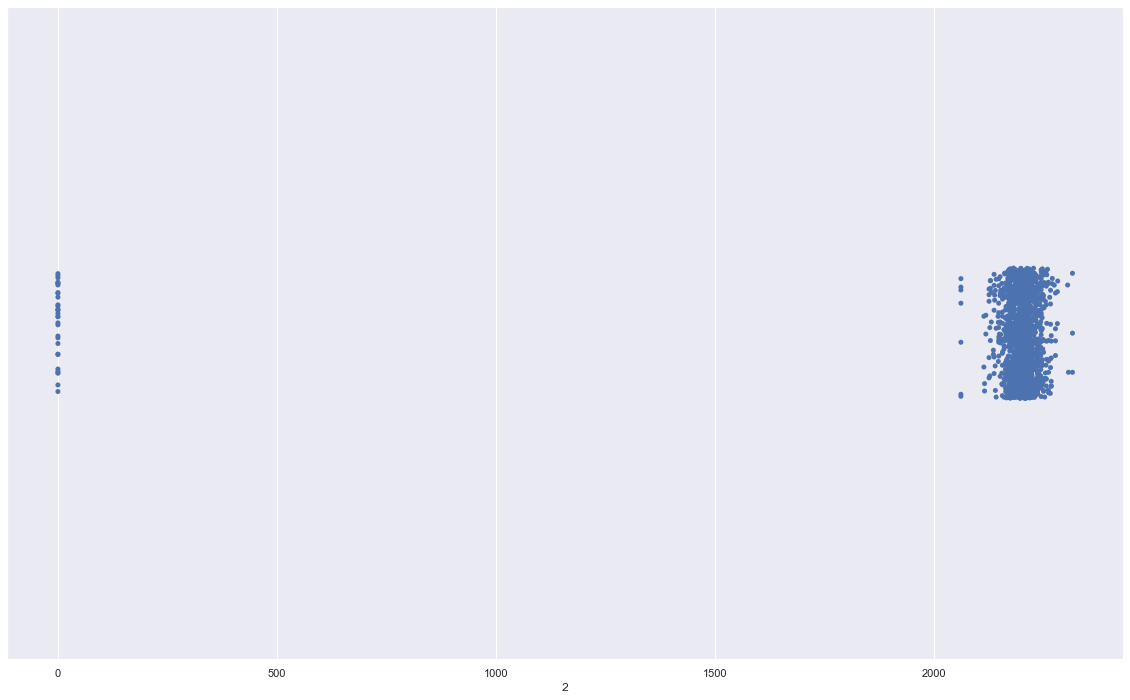

In [34]:
#stripplot
#graph for 2 (univariate graph) and it depicts the distribution of the data points.
plt.figure(figsize=(20,12))
sns.stripplot(data4['2'])

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0', ylabel='Density'>

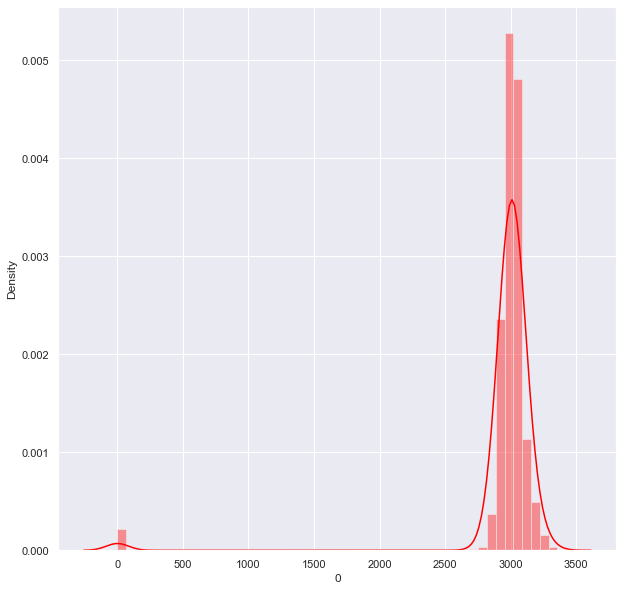

In [35]:
#dist plots
#0
#graph for '0' (univariate graph) and it depicts the distribution of the data points.
sns.distplot(data4['0'],color='Red')

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

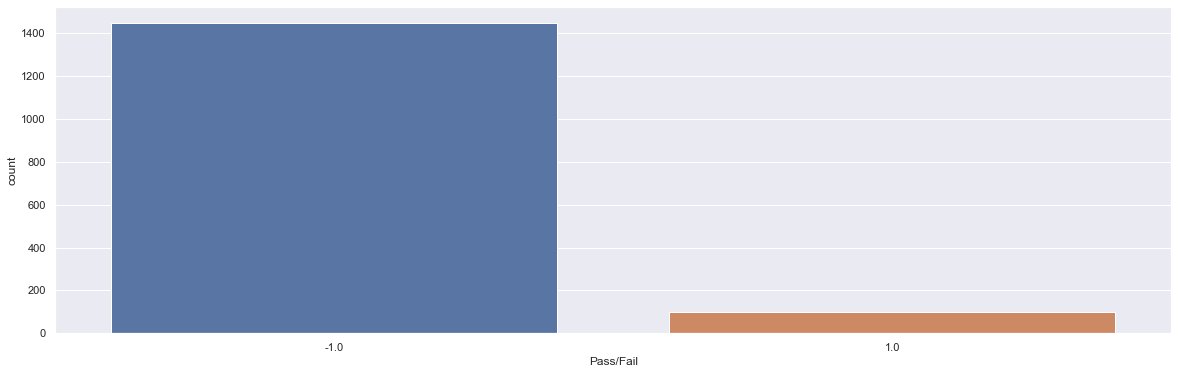

In [36]:
#Count plot
#plot for 'pass/fail'
plt.figure(figsize=(20,6))
sns.countplot(data4['Pass/Fail'])

In the above plot 



-1- pass

+1- fail

It is clearly evident that the value of 'pass' is about 1400 and 'fail' is about 50 or less than 200.

In [37]:
#Bivariate plots
unique_values = data4['Pass/Fail'].unique()  # [0, 1, 2]
T = [data4.loc[data4['Pass/Fail'] == val] for val in unique_values]

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable

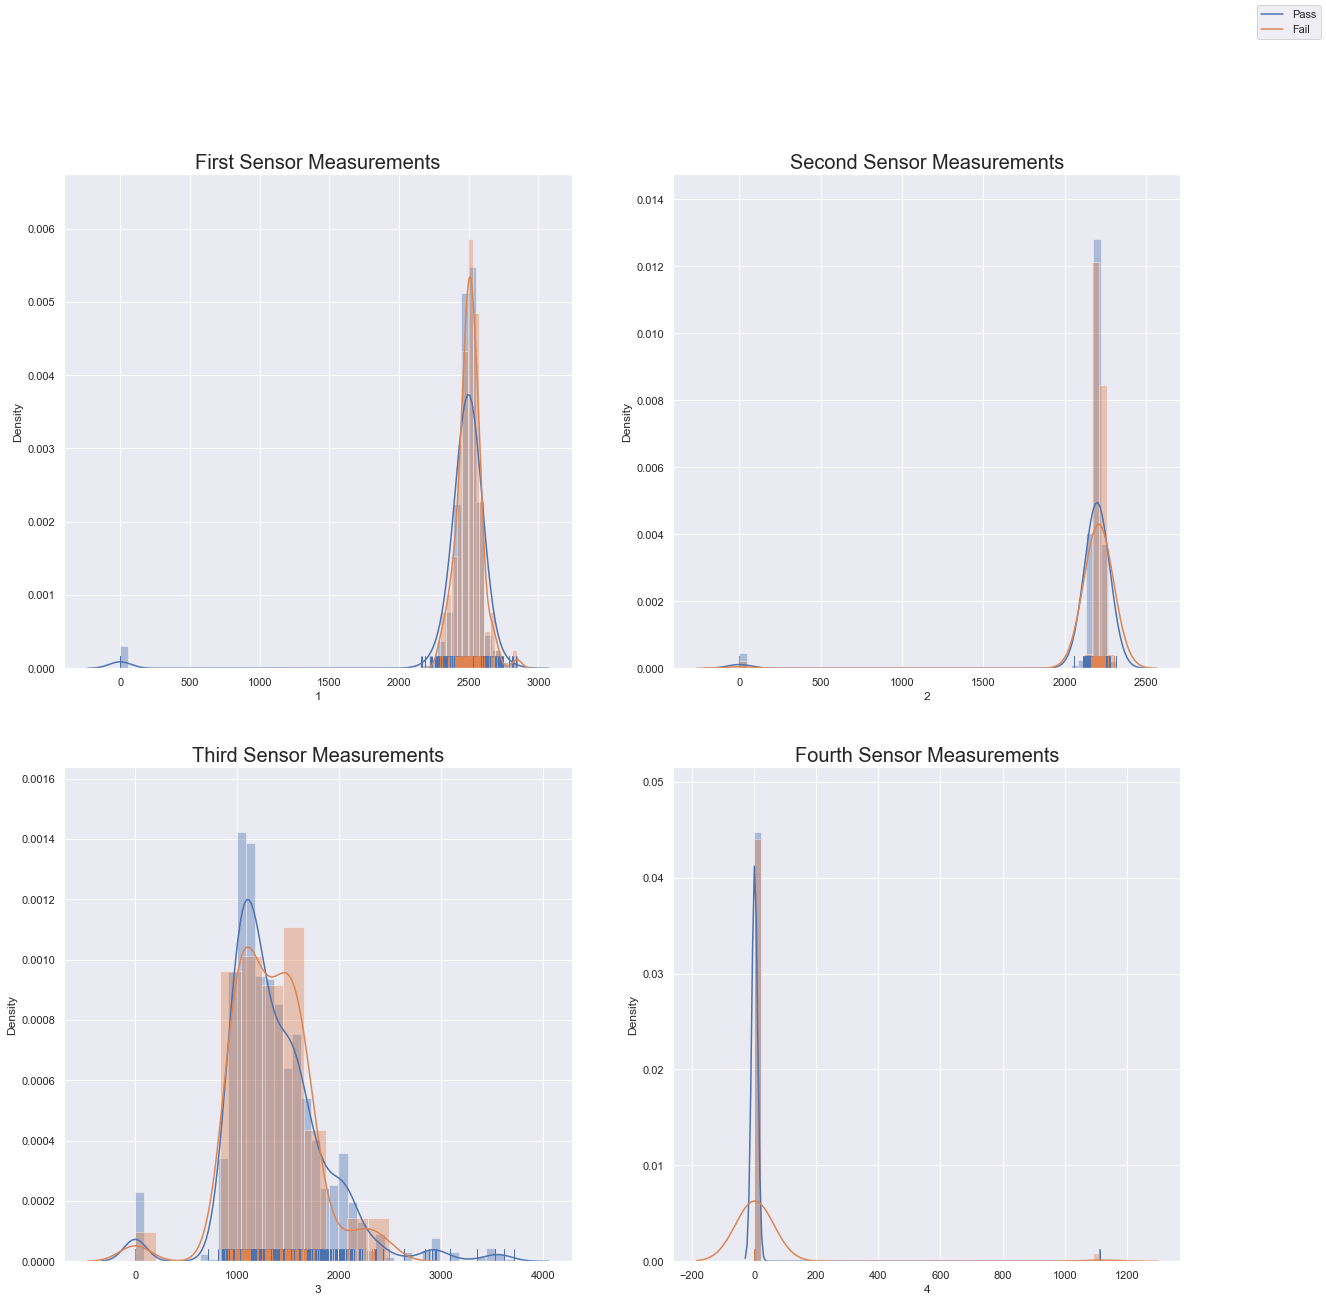

In [38]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for t in T:
    sns.distplot(t['1'], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for t in T:
    sns.distplot(t['2'], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for t in T:
    sns.distplot(t['3'], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for t in T:
    sns.distplot(t['4'], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()


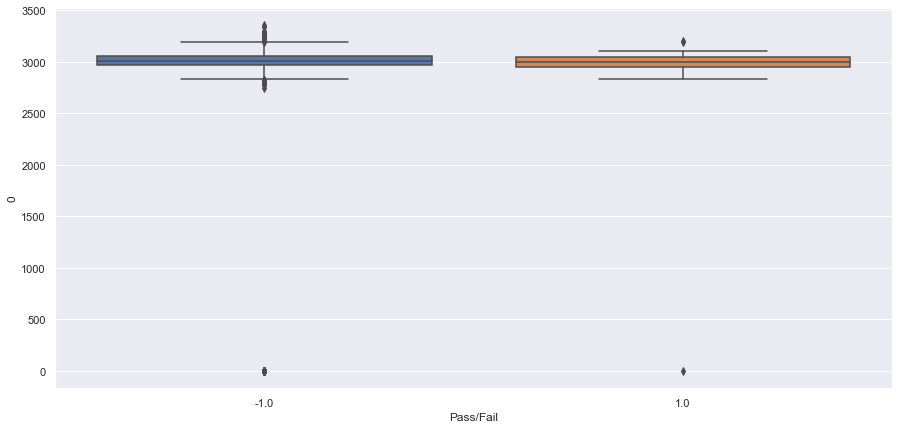

In [39]:
#'0' vs'pass/fail'
plt.figure(figsize=(15,7))
sns.boxplot(x='Pass/Fail', y='0', data= data4)
plt.show()

From the above plot it can be determined that the values of 'pass'(-1) are higher than fail(1).

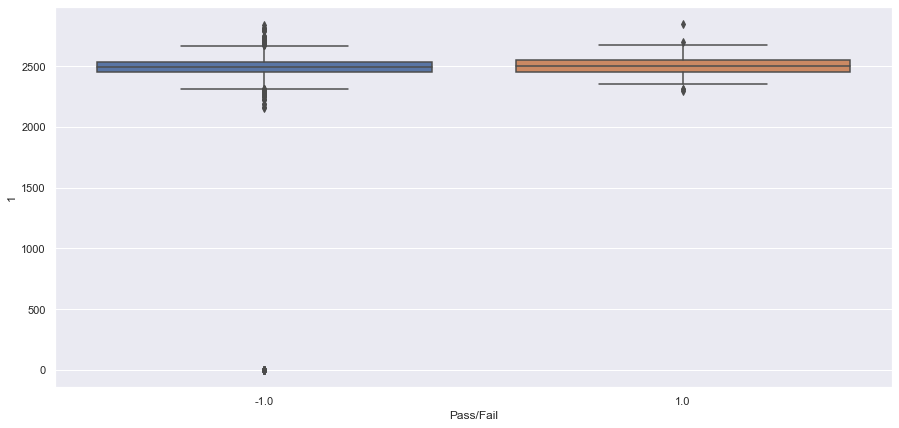

In [40]:
#1 vs pass/fail
plt.figure(figsize=(15,7))
sns.boxplot(x='Pass/Fail', y='1', data=data4)
plt.show()

From the above plot it can be determined that the values of 'pass'(-1) are higher than fail(1)

In [41]:
#multivariate plot
#pair plot
#sns.pairplot(data1, diag_kind='kde')

<Figure size 360x360 with 0 Axes>

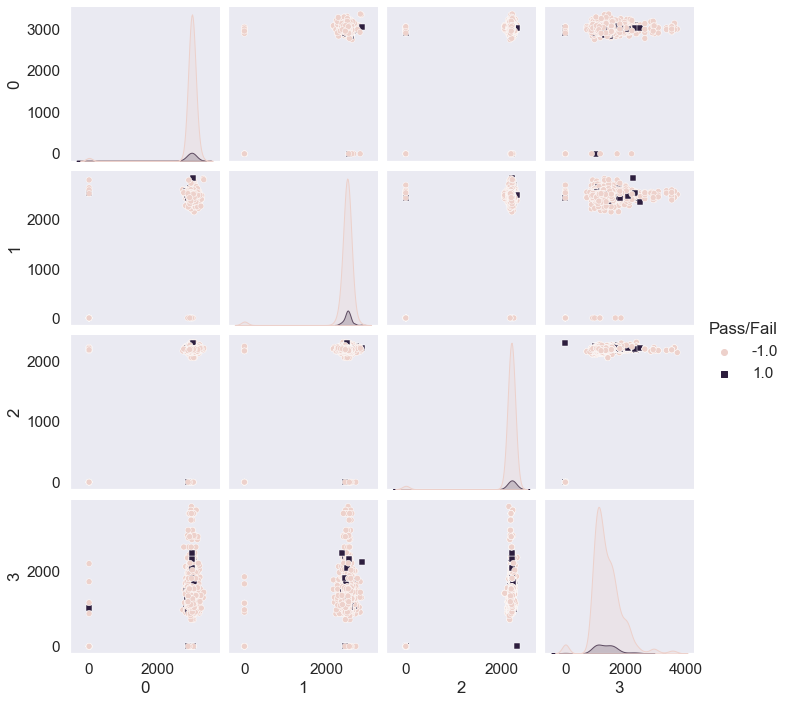

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pairplot(data4, vars=['0','1' ,'2','3'], hue = "Pass/Fail", markers=["o", "s"])
plt.show()

The above is a multivariate plot which displays the relation between the Pass/Fail and 1,0,2,3

<Figure size 1296x1296 with 0 Axes>

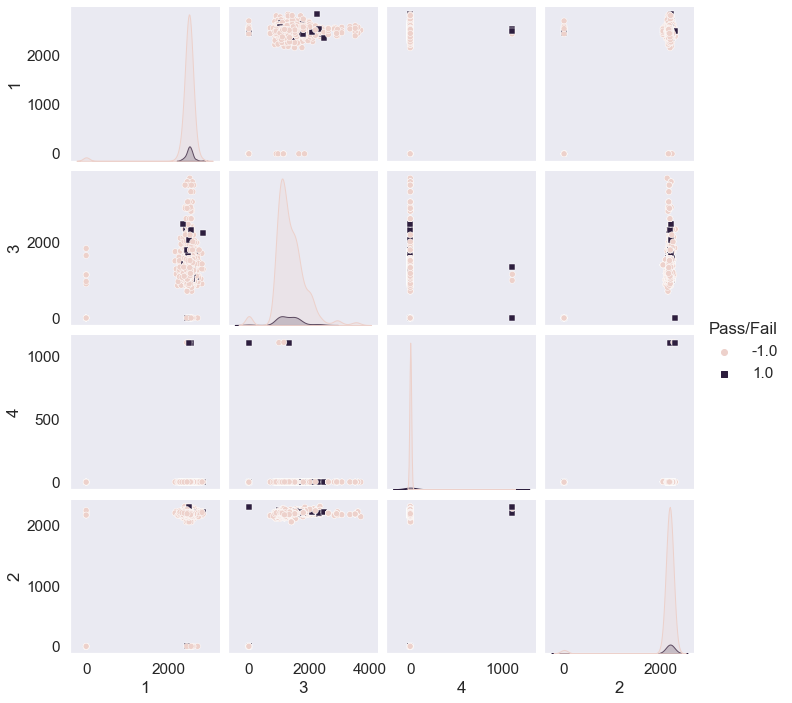

In [427]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pairplot(data4, vars=['1','3' ,'4','2'], hue = "Pass/Fail", markers=["o", "s"])
plt.show()

The above is a multivariate plot which displays the relation between the Pass/Fail and 1,2,3,4.

Text(0.5, 1.0, 'Correlation heatmap for the Data')

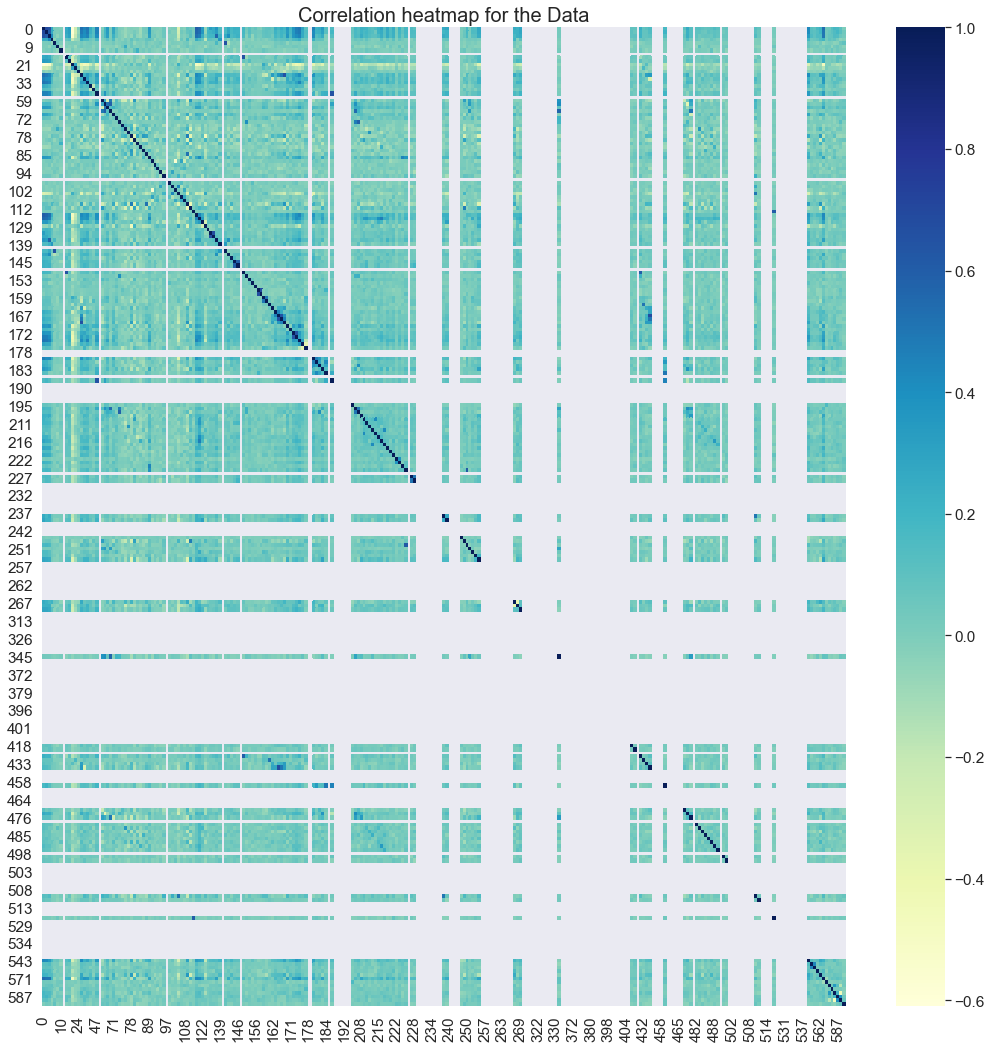

In [396]:
#correlation
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data4.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

In [42]:
#4. Data preprocessing
#seggregate predictors vs target attributes
x = data4.drop(columns='Pass/Fail')
y = data4['Pass/Fail']


In [43]:
# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1549, 272)
shape of y: (1549,)


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


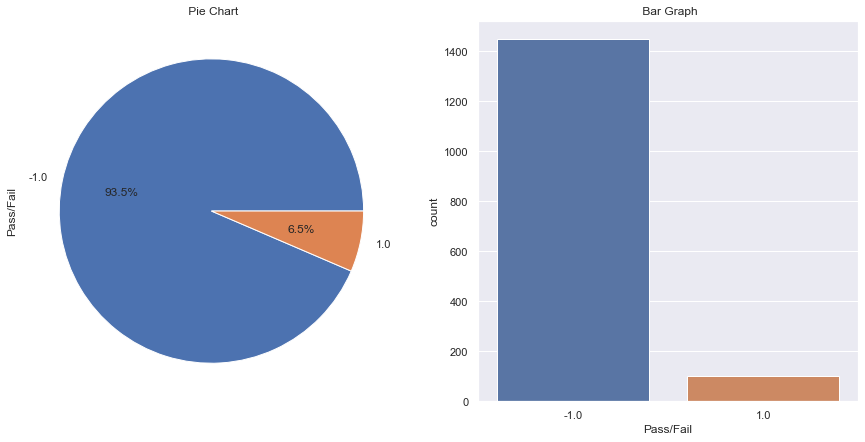

In [44]:
#checking for target balancing and fix it if imbalanced
#target balance check
f,axes=plt.subplots(1,2,figsize=(15,7))
data4['Pass/Fail'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Pass/Fail',data=data4,ax=axes[1])
axes[0].set_title(' Pie Chart')
axes[1].set_title(' Bar Graph')
plt.show()

From the above plot, it is clearly evident that the data is highly imbalanced and hence, it will not be able to perform well on onseen data.

In [45]:
#Smote the imbalanced data
import pandas as pd

def clean_dataset(d):
    assert isinstance(data4, pd.DataFrame), "data needs to be a pd.DataFrame"
    data4.dropna(inplace=True)
    indices_to_keep = ~data4.isin([np.nan, np.inf, -np.inf]).any(1)
    return data4[indices_to_keep].astype(np.float64)

In [46]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE().fit_resample(x, y)

# Count instances of each class
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(-1.0, 1449), (1.0, 1449)]


In [47]:
#test split for smote
from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=1)

In [48]:
# perform Train & Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [49]:
# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1084, 272)
shape of x_test:  (465, 272)
shape of y_train:  (1084,)
shape of y_test:  (465,)


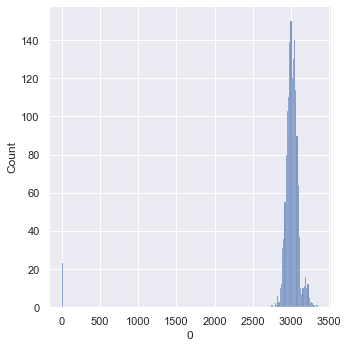

In [50]:
#Check if the train and test data have similar statistical characteristics when compared with original data
#Comparing '0' of training data with original data
sns.displot(data4, x="0")

In [51]:
x_train.head()

,0,1,2,3,4,9,10,13,14,16,...,551,559,562,571,572,578,583,586,587,589
603,2931.40,2573.21,2171.8556,940.9917,1.2906,0.0153,0.0065,0.0,10.3117,9.3242,...,2.23,0.3463,0.000,1.9972,9.06,0.0,0.0086,0.0227,0.0149,65.4831
943,3044.39,2526.85,2211.4334,2130.9862,1.1351,-0.0251,0.0018,0.0,11.2013,9.0542,...,0.87,0.4087,269.896,2.2421,8.49,0.0,0.0093,0.0178,0.0119,66.7668
1180,3075.32,2491.07,2185.1000,1201.0491,0.7821,-0.0151,-0.0006,0.0,3.0143,10.2629,...,1.69,0.1863,264.272,2.0320,5.81,0.0,0.0128,0.0223,0.0105,47.0690
988,3072.86,2434.60,2206.1444,1876.9899,2.0607,0.0031,0.0024,0.0,9.3601,9.6125,...,1.23,0.1406,266.454,2.3490,10.19,0.0,0.0125,0.0552,0.0178,32.2058
1097,3182.35,2520.40,2187.7888,1350.3395,0.7945,-0.0164,-0.0114,0.0,4.3504,9.5044,...,0.72,0.1275,264.272,1.9809,6.95,0.0,0.0173,0.0169,0.0236,139.6209


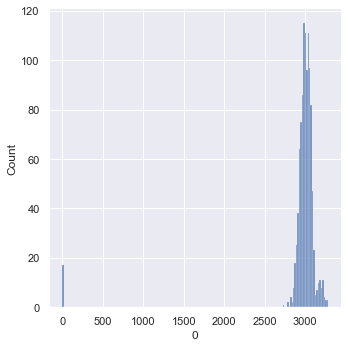

In [52]:
sns.displot(x_train, x="0")

From the above plot, it can be determined that the values of both the training and orginal data are almost the same. It also has the same statistical characteristics.

In [53]:

#Comparing '1' of training data with original data
mean1= x_train['1'].mean() #training data tenure mean
mean2= data4['1'].mean() #original data mean
print('Train data 1 mean', mean1)
print('original data 1 mean',mean2)

Train data 1 mean 2449.1764575645775
original data 1 mean 2455.0674241446104


From the above, it is clearly evident that the mean of the orginal data for the attribute '1' is slightly higher than the mean of  the training data.

In [54]:
#comparing standard deviation of '2'
std1= x_train['2'].std() #training data std
std2= data4['2'].std() #original data std
print(std1)
print(std2)

318.4758411099958
309.60841300556433


From the above values of standard deviation, it can be determined that the value of the standard deviation for training data is higher than that of the original data.

In [55]:
variance1=x_train['3'].var() #training data TotalCharges 3
variance2=data4['3'].var()
print(variance1)
print(variance2)

230992.92876838802
231887.77612261727


From the above values of variance, it is clearly evident that the variance of the orginal data is slightly higher than that of the training data.

In [56]:
#Comparing test data and original data
variance5=x_test['3'].var() #training data TotalCharges 3
variance6=data4['3'].var()
print(variance5)
print(variance6)

234159.5957247543
231887.77612261727


From the above, it is clearly evident that the variance of testing data is slightly lower than that of the original data.

In [57]:
std3= x_test['3'].std() #training data std
std4= data4['3'].std() #original data std
print("Testing data standard deviation",std3)
print("Original data std",std4)

Testing data standard deviation 483.9003985581685
Original data std 481.54727298845467


From the above, it is evident that the standard deviation of both testing data and original data are almost the same.

In [58]:
meantest= x_test['3'].mean() #testing data mean
meano= data4['3'].mean() #original data mean
print('Test data mean:', meantest)
print('Original data mean:',meano)

Test data mean: 1388.2172309677417
Original data mean: 1373.3493708198803


From the above, it is clearly evident that the mean of the testing data is slightly higher than the original mean.

In [59]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [60]:
#5. Model training, testing and tuning.
#Model training
#Pick up a supervised model
#XGBoost Algorithm (Normal data)

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
import xgboost as xgb

In [63]:
#train the model

In [64]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
model = XGBClassifier(random_state=1)
model.fit(x_train1, y_train)
y_pred = model.predict(x_test1)

[22:13:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:>

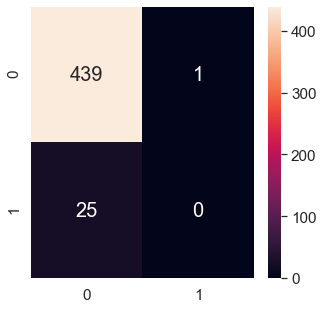

In [65]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 20},fmt='g')

In [66]:
print("Accuracy on testing data: ", model.score(x_test1,y_test)*100)

Accuracy on testing data:  94.40860215053763


In [67]:
print("Accuracy on training data: ", model.score(x_train1,y_train)*100)

Accuracy on training data:  100.0


From the above accuracy for testing data, it is clearly evident that In the failure class we have only 1 observation classified correctly for XGBoost but still has 94.5% accuracy as we predicted correctly on the observations that passed.

In [68]:
#use cross validation techniques
# Applying k-Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model1 = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model1, x, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


[22:13:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 93.48% (4.58%)


From the above, it is clearly evident that the accuracy of the testing data with XGBoost classifier and kfoldcv is about 93.5%.

In [69]:
#Stratified K-fold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
model4 = xgb.XGBClassifier()
kfold2 = StratifiedKFold(n_splits=10, random_state=None)
results2 = cross_val_score(model4, x, y, cv=kfold2)
print("Accuracy: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

[22:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 92.06% (2.55%)


From the above, it is clearly evident that the accuracy of the testing data with Xgboost and stratified kfold is about 92%.

In [71]:
#Hyper parameter tuning

In [72]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)



In [74]:
grid_search = grid_search.fit(x_train1, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:56:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

Best Accuracy:  92.98856460146781
Best Parameter:  {'cv': 2, 'max_depth': 3, 'random_state': 1}


In [76]:
#RandomsearchCv
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()

In [77]:
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight':[ 1, 3, 5, 7 ],
    'gamma':[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'colsample_bytree':[ 0.3, 0.4, 0.5 , 0.7 ]
}

In [78]:
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [79]:
rs_model.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:56:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [80]:
#parameters selected
rs_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
classifier1=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
from sklearn.model_selection import cross_val_score
score4=cross_val_score(classifier1,x,y,cv=10)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [83]:
print("Accuracy: %.2f%% (%.2f%%)" % (score4.mean()*100, score4.std()*100))

Accuracy: 93.22% (0.78%)


From the above, it is evident that the accuracy on testing data with randomized searchCv is about 93.22%

In [84]:
#se any other technique/method which can enhance the model performance.
#PCA- dimensionality reduction
#Scaling the data before applying PCA
from scipy.stats import zscore
data_new=data4.copy().apply(zscore)
data_new.head()

,0,1,2,3,4,9,10,13,14,16,...,559,562,571,572,578,583,586,587,589,Pass/Fail
18,0.052252,-0.029671,0.216362,0.309943,-0.052853,-1.246728,0.940545,NaN,-0.465509,0.270343,...,-0.578062,-2.123857,0.927625,-0.202366,1.621060,-0.167661,0.621596,0.033600,-0.439115,-0.262703
19,0.030933,-0.470323,0.212091,0.090304,-0.053248,-1.039199,2.274974,NaN,-1.029815,-0.108616,...,0.101051,0.511052,0.528473,-0.208721,0.165572,0.255954,-0.861370,-0.033832,0.573915,-0.262703
20,-0.032110,0.268658,0.214783,0.361999,-0.048510,-0.824975,0.842904,NaN,-1.133407,-0.001021,...,0.254383,-2.123857,-0.507636,-0.247083,0.525532,-0.340246,-0.494615,-0.123742,0.024872,-0.262703
21,0.126829,0.233001,0.042862,-0.390336,-0.052089,0.708065,-0.155206,NaN,-1.204392,0.010056,...,-1.091972,-2.123857,0.405354,-0.256326,-0.648249,-0.387314,-0.494615,-0.123742,0.024872,-0.262703
22,-0.021222,0.279353,0.211229,0.270619,-0.053035,-1.132922,1.504694,NaN,-0.815305,-0.083205,...,-0.630986,0.442511,0.357849,-0.187230,0.830715,0.412849,-0.183671,-0.854260,-0.559543,-0.262703


In [85]:
data_new.isnull().any().any()

True

In [86]:
data_new = data_new.replace(np.NaN, 0)

In [87]:
data_new.isnull().any().any()

False

In [88]:
# separating the dependent and independent data

x1 = data_new.drop(columns='Pass/Fail')
y1 = data4["Pass/Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x1.shape)
print("shape of y:", y1.shape)

shape of x: (1549, 272)
shape of y: (1549,)


In [89]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(x1.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00064599  0.69592208  0.65739043 ...  0.18181876  0.16838492
   0.10562127]
 [ 0.69592208  1.00064599  0.60864216 ...  0.14579789  0.18306756
   0.11745501]
 [ 0.65739043  0.60864216  1.00064599 ...  0.14958257  0.14039287
   0.06204288]
 ...
 [ 0.18181876  0.14579789  0.14958257 ...  1.00064599  0.19128777
  -0.45487108]
 [ 0.16838492  0.18306756  0.14039287 ...  0.19128777  1.00064599
   0.40506201]
 [ 0.10562127  0.11745501  0.06204288 ... -0.45487108  0.40506201
   1.00064599]]


In [90]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.23698565  0.00934132  0.02649968 ...  0.          0.
   0.        ]
 [-0.22442087 -0.0007247   0.01991864 ...  0.          0.
   0.        ]
 [-0.21337609 -0.02199633  0.02038908 ...  0.          0.
   0.        ]
 ...
 [-0.05555277  0.05396647  0.0226343  ...  0.          0.
   0.        ]
 [-0.05665755 -0.01043228  0.02573206 ...  0.          0.
   0.        ]
 [-0.02994319 -0.03077766 -0.0322394  ...  0.          0.
   0.        ]]

 Eigen Values 
%s [12.80297234  6.55684318  3.31149208  3.107825    2.86749494  2.51099419
  2.44151949  2.32014345  2.21300971  2.15294112  2.07507362  2.01764843
  1.97162624  1.90924041  1.87824597  1.866737    1.82057118  1.80462446
  1.76710243  1.77257065  1.67790458  1.64548111  1.63631113  1.59002205
  1.52311411  1.54590425  1.53633029  1.49542113  1.47044098  1.4489365
  1.42240634  1.38859999  1.37995012  1.34185048  1.33251167  1.32527669
  1.30385374  0.03778622  0.07964053  0.09520828  1.28430563  1.25819844
  1.23813

In [91]:
total = sum(eig_vals)
var_exp = [( i /total ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  7.99669189  12.09207328  14.16041969  16.10155635  17.89258369
  19.46094191  20.98590647  22.43505998  23.81729813  25.16201765
  26.45810139  27.71831757  28.94978844  30.14229335  31.31543923
  32.48139665  33.61851907  34.74568121  35.85282266  36.95654868
  38.00456203  39.03232379  40.05435802  41.04748025  42.01304666
  42.9726332   43.92396496  44.85799979  45.7764321   46.68143279
  47.56986283  48.43717754  49.29908958  50.13720471  50.96948686
  51.79725006  52.61163256  53.41380538  54.19967174  54.97300626
  55.73998109  56.48895539  57.23397649  57.96476692  58.68868711
  59.40269643  60.10681993  60.79753768  61.48710173  62.17065965
  62.83866945  63.49941237  64.15305097  64.79858694  65.43805073
  66.07275521  66.69810776  67.31596108  67.92590002  68.53105142
  69.13051193  69.71859802  70.29809445  70.87224801  71.4394483
  71.99836313  72.55382674  73.10076458  73.64555681  74.18360029
  74.7127482   75.23720458  75.74988279  76.259

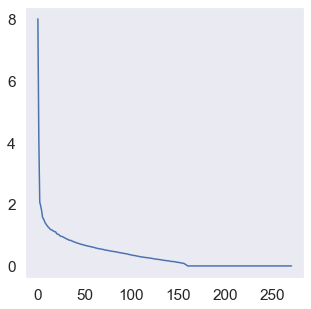

In [92]:
plt.plot(var_exp)

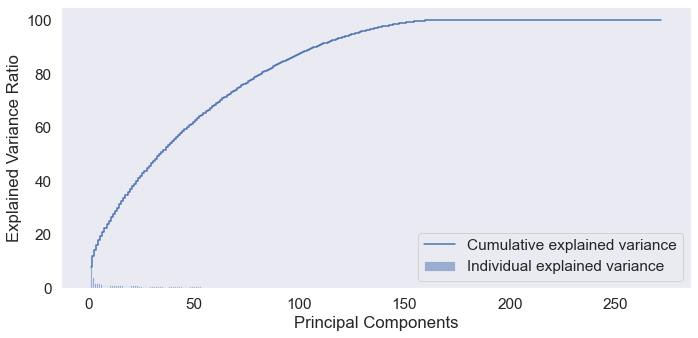

In [93]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [94]:
len(cum_var_exp)

272

In [95]:
# Using scikit learn PCA here.
from sklearn.decomposition import PCA
# we are generating only 130 PCA dimensions (dimensionality reduction from 272 to 130)
# For 130 components we are getting approximately 90% of the variance
pca = PCA(n_components=130)
data_reduce = pca.fit_transform(x1)
data_reduce.transpose()

array([[ 1.56272736e+00,  1.23146490e+00, -1.41879825e+00, ...,
         3.15053419e+01,  3.15053419e+01,  3.15053419e+01],
       [ 4.61343284e+00,  2.40378593e+00,  3.91631780e+00, ...,
        -2.41189695e-01, -2.41189695e-01, -2.41189695e-01],
       [ 4.17285473e-01,  2.87534374e-01,  1.17108833e+00, ...,
         7.74799989e-01,  7.74799989e-01,  7.74799989e-01],
       ...,
       [ 1.07682936e-01,  6.86533644e-02, -1.30707526e+00, ...,
        -1.99922602e-02, -1.99922602e-02, -1.99922602e-02],
       [ 3.80961295e-01,  7.08822957e-01, -3.75459029e-02, ...,
         4.42251549e-02,  4.42251549e-02,  4.42251549e-02],
       [-2.60298950e-01, -4.26918664e-01,  1.53447262e-01, ...,
         3.67565950e-02,  3.67565950e-02,  3.67565950e-02]])

In [96]:
pca.components_

array([[-0.23698565, -0.22442087, -0.21337609, ..., -0.05555277,
        -0.05665755, -0.02994319],
       [-0.00934132,  0.00072469,  0.02199633, ..., -0.05396647,
         0.01043227,  0.03077766],
       [-0.02649956, -0.01991871, -0.02038907, ..., -0.02263448,
        -0.0257319 ,  0.03223922],
       ...,
       [-0.12575834,  0.20110594, -0.02944591, ..., -0.0224696 ,
        -0.047094  ,  0.01412876],
       [ 0.07496169, -0.18556691,  0.08358281, ..., -0.04430283,
         0.01946217, -0.01961556],
       [-0.01679268, -0.06082285, -0.0345251 , ..., -0.01456297,
        -0.03280078,  0.06894688]])

In [97]:
df_c = pd.DataFrame(pca.components_,columns=list(x1))
df_c.head()

,0,1,2,3,4,9,10,13,14,16,...,551,559,562,571,572,578,583,586,587,589
0,-0.236986,-0.224421,-0.213376,-0.088947,-0.005731,-0.001572,0.001980,-5.169879e-26,-0.090197,-0.114041,...,-0.033672,-0.048826,-0.065179,-0.173542,-0.010389,-0.017061,-0.034825,-0.055553,-0.056658,-0.029943
1,-0.009341,0.000725,0.021996,-0.062669,-0.029251,-0.040382,0.022128,2.117582e-22,0.004597,0.030681,...,-0.013848,-0.014074,-0.177526,0.082203,-0.022989,-0.011595,0.003160,-0.053966,0.010432,0.030778
2,-0.026500,-0.019919,-0.020389,0.013144,0.020879,-0.022446,0.021130,-5.551115e-17,-0.019729,-0.033377,...,0.018493,0.023073,0.044778,-0.033389,0.027815,0.025125,0.003895,-0.022634,-0.025732,0.032239
3,-0.011379,-0.032666,-0.026319,-0.043741,-0.040722,-0.021248,-0.054343,1.665335e-16,-0.012228,0.025415,...,-0.078921,-0.037801,-0.088016,-0.000404,-0.020536,-0.118442,-0.005292,0.014538,-0.050217,-0.059542
4,0.000871,0.004726,-0.028532,-0.010312,0.002965,0.044928,-0.030560,2.775558e-17,0.115575,0.024866,...,0.025197,0.020162,0.029094,-0.019629,-0.012907,-0.011586,-0.015688,-0.102855,0.104428,0.161870


<AxesSubplot:>

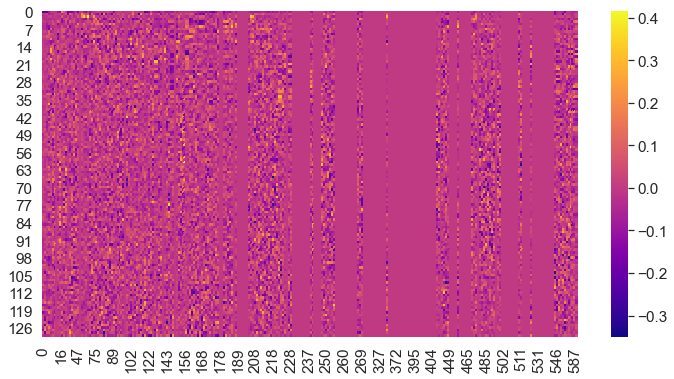

In [98]:
plt.figure(figsize=(12,6))
sns.heatmap(df_c,cmap='plasma',)

In [99]:
data_reduce.shape

(1549, 130)

In [100]:
df_red = pd.DataFrame(data_reduce)
df_red.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,1.562727,4.613433,0.417285,-4.613339,-2.548519,-0.852256,-1.618819,2.673699,3.983588,-0.103406,...,1.394322,1.916857,-0.041972,0.505604,0.058098,1.456828,0.039105,0.107683,0.380961,-0.260299
1,1.231465,2.403786,0.287534,-2.654796,-0.294054,-1.616677,-1.411648,-0.445792,0.788476,1.951738,...,-0.036383,0.165309,0.199323,0.618116,0.642373,0.332220,-0.394745,0.068653,0.708823,-0.426919
2,-1.418798,3.916318,1.171088,-4.541896,-1.428652,-0.371388,-0.705847,-0.793706,-2.215229,5.708163,...,0.381049,0.384901,-0.782822,1.753583,0.918432,-2.380126,-1.158252,-1.307075,-0.037546,0.153447
3,-0.837038,2.199093,0.761503,-0.602359,-0.162257,0.277091,0.020460,-1.440710,-1.813269,2.390079,...,-0.634008,0.579702,-1.103904,0.271327,0.206760,0.748236,0.419387,-0.446852,0.938603,1.051177
4,-0.400249,2.560947,0.826265,-3.305167,-4.556182,-2.122679,0.586098,1.519569,2.795435,0.707674,...,-1.687826,-1.830919,0.028041,1.624322,0.446125,1.968346,0.766320,0.294210,-0.953920,0.032215


In [101]:
df_red5 = df_red.copy()
df_red6 = df_red5
df_red6["Pass/Fail"] = data4["Pass/Fail"]

In [102]:
df_red6.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,Pass/Fail
0,1.562727,4.613433,0.417285,-4.613339,-2.548519,-0.852256,-1.618819,2.673699,3.983588,-0.103406,...,1.916857,-0.041972,0.505604,0.058098,1.456828,0.039105,0.107683,0.380961,-0.260299,NaN
1,1.231465,2.403786,0.287534,-2.654796,-0.294054,-1.616677,-1.411648,-0.445792,0.788476,1.951738,...,0.165309,0.199323,0.618116,0.642373,0.332220,-0.394745,0.068653,0.708823,-0.426919,NaN
2,-1.418798,3.916318,1.171088,-4.541896,-1.428652,-0.371388,-0.705847,-0.793706,-2.215229,5.708163,...,0.384901,-0.782822,1.753583,0.918432,-2.380126,-1.158252,-1.307075,-0.037546,0.153447,NaN
3,-0.837038,2.199093,0.761503,-0.602359,-0.162257,0.277091,0.020460,-1.440710,-1.813269,2.390079,...,0.579702,-1.103904,0.271327,0.206760,0.748236,0.419387,-0.446852,0.938603,1.051177,NaN
4,-0.400249,2.560947,0.826265,-3.305167,-4.556182,-2.122679,0.586098,1.519569,2.795435,0.707674,...,-1.830919,0.028041,1.624322,0.446125,1.968346,0.766320,0.294210,-0.953920,0.032215,NaN


In [103]:
df_red6.shape

(1549, 131)

In [104]:
#checking outliers

array([[<AxesSubplot:title={'center':'0'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'1'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'2'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'3'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'4'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'5'}, xlabel='Pass/Fail'>]],
      dtype=object)

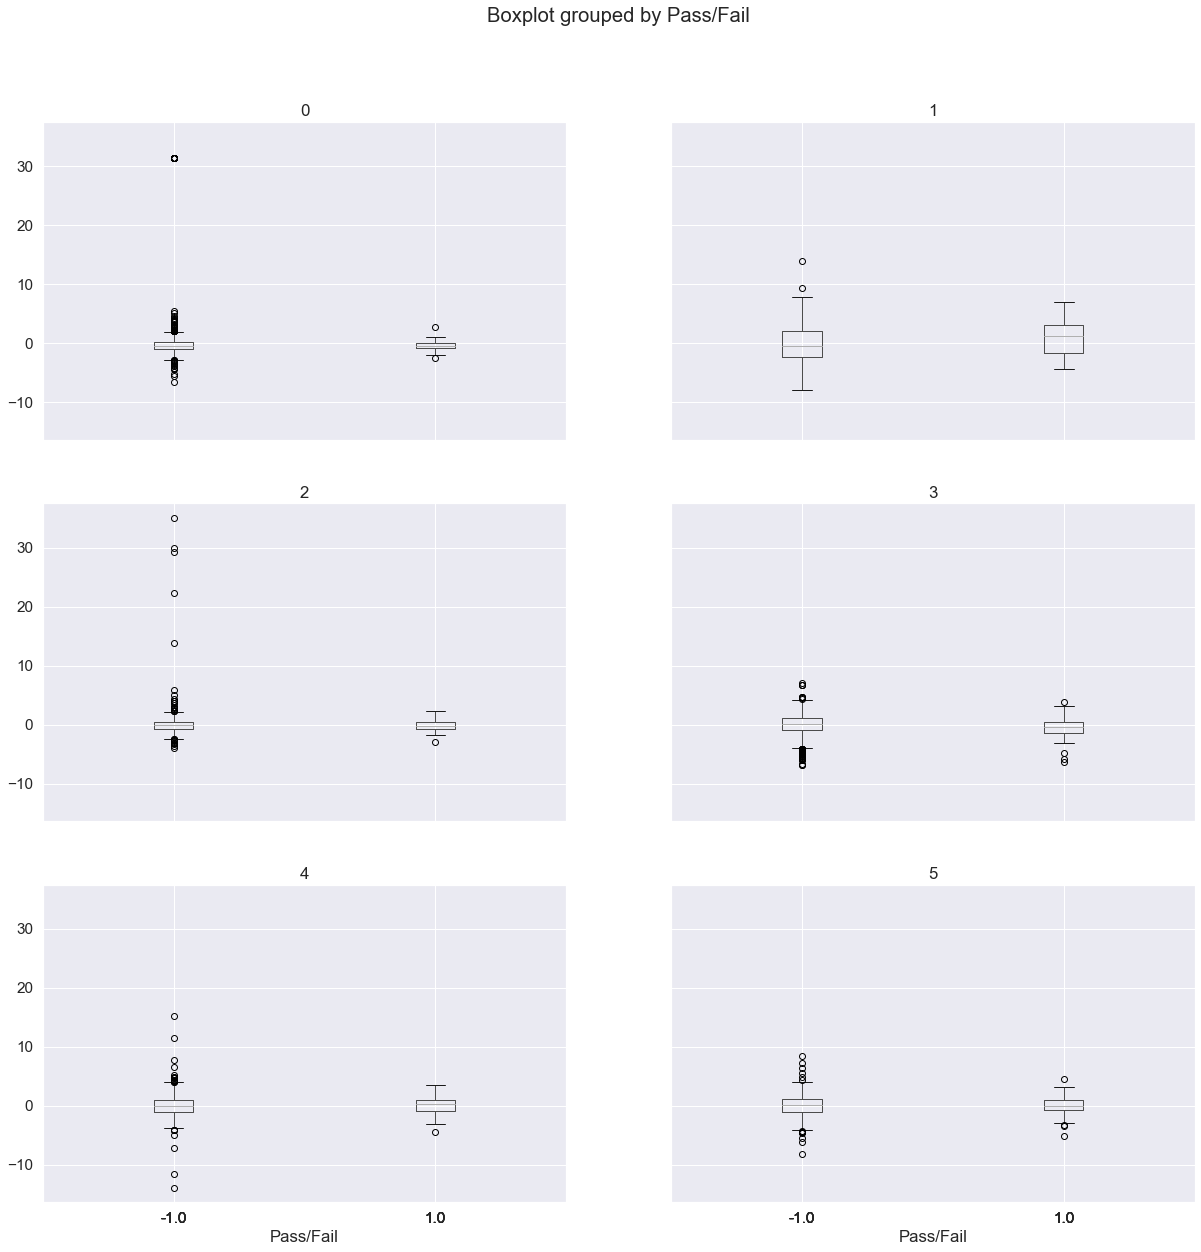

In [105]:
df_red6.boxplot(column = [df_red6.columns[0],
                          df_red6.columns[1],
                          df_red6.columns[2],
                          df_red6.columns[3], 
                          df_red6.columns[4],
                          df_red6.columns[5],
                         ]
                          , by = 'Pass/Fail', figsize=(20,20))

In [106]:
#Create a copy of the dataset for maintain data after outlier removal
dc_r=df_red6.copy()

In [107]:
#removing outliers on the copy of the dataframe ie- dc_r
from scipy import stats

#Define a function to remove outliers on max side
def outlier_removal_max(o_m):
    o_m = np.where(o_m > o_m.quantile(0.75)+ stats.iqr(o_m),o_m.quantile(0.50),o_m)
    return o_m

#Define a function to remove outliers on min side
def outlier_removal_min(var1):
    var1 = np.where(var1 < var1.quantile(0.25) - stats.iqr(var1),var1.quantile(0.50),var1)
    return var1

#Loop over the columns and remove the outliers on min and max side
for column in dc_r:
    dc_r[column] = outlier_removal_max(dc_r[column])
    dc_r[column] = outlier_removal_min(dc_r[column])


array([[<AxesSubplot:title={'center':'0'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'1'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'2'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'3'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'4'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'5'}, xlabel='Pass/Fail'>]],
      dtype=object)

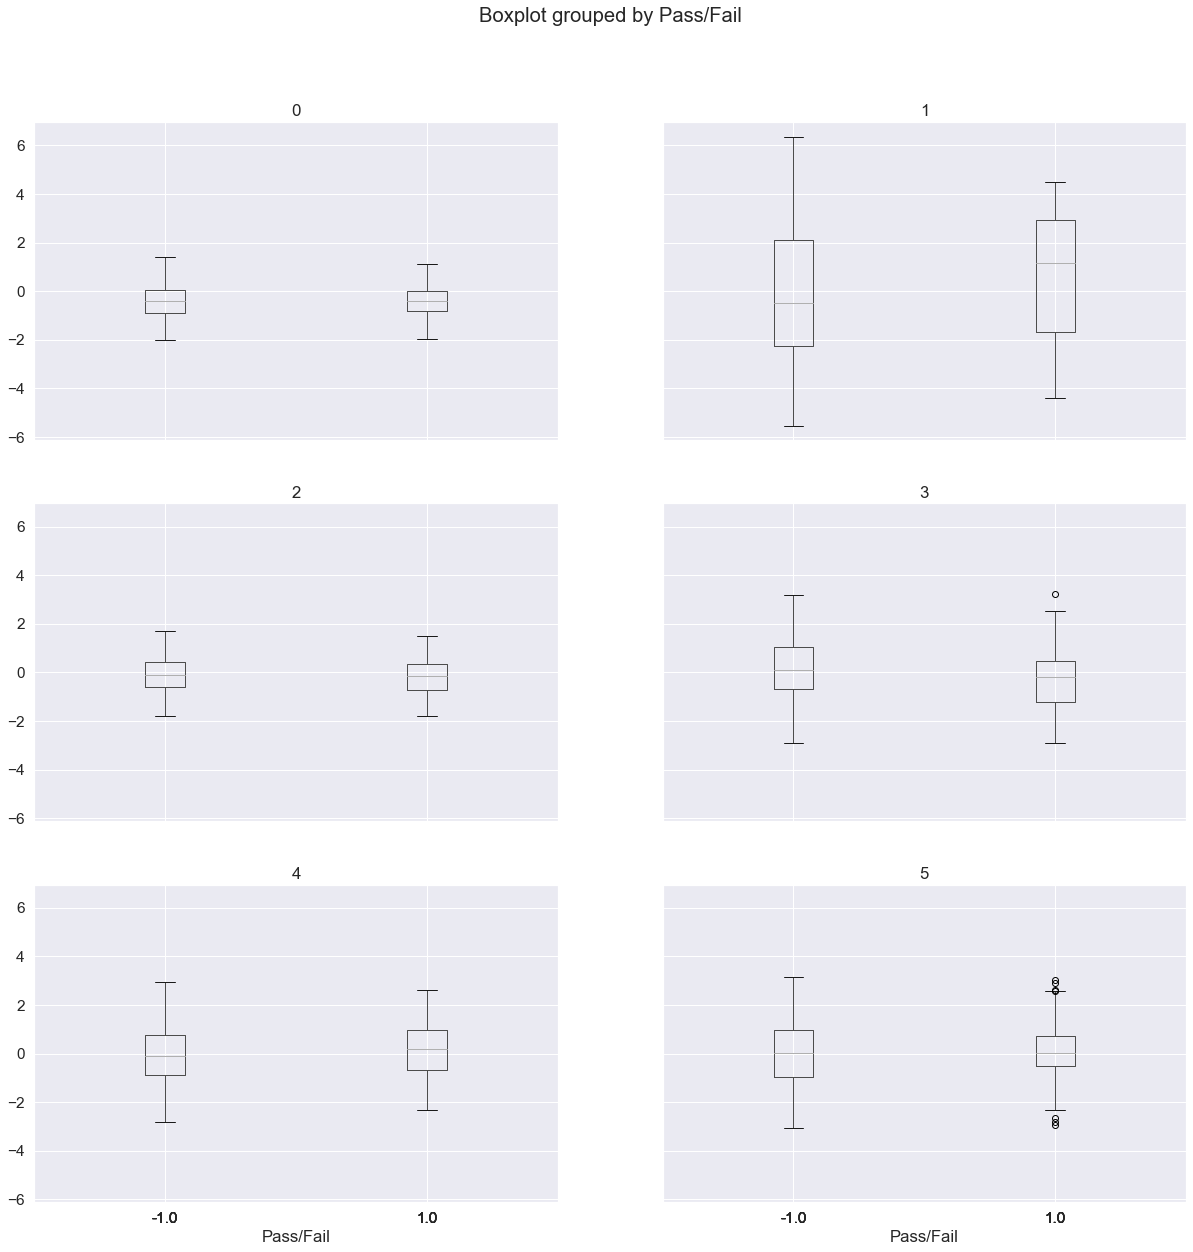

In [108]:
#checking outliers
dc_r.boxplot( column =[df_red6.columns[0],
                          df_red6.columns[1],
                          df_red6.columns[2],
                          df_red6.columns[3], 
                          df_red6.columns[4],
                          df_red6.columns[5],
                         ],by = 'Pass/Fail', figsize=(20,20))

In [109]:
#modelX = XGBClassifier(random_state=1)

##modelX.fit(x_train_r, y_train_r)

#y_pred2= modelX.predict(x_test_r)

#cm1 = confusion_matrix(y_test_r, y_pred2)

In [110]:
#confusion matrix
#plt.rcParams['figure.figsize'] = (5, 5)
#ns.set(style = 'dark', font_scale = 1.4)
#ns.heatmap(cm1, annot = True, annot_kws = {"size": 15},fmt='g')

In [111]:
#print("Accuracy: ", modelX.score(x_test_r,y_test_r)*100)

In [112]:
#From the above, it is evident that the accuracy on testing data with Xgboost after PCA is about 94.3% but the data is imbalanced

In [141]:
#undersampling
failed = np.array(df_red6[df_red6['Pass/Fail'] == 1].index)
no_failed = len(failed)

print(no_failed)

100


In [142]:
#passed tests
passed = df_red6[df_red6['Pass/Fail'] == -1]
no_pass= len(passed)

print(no_pass)

1431


In [143]:
# Get 100 random observations from the pass class as well

random_pass = np.random.choice(no_pass, size = no_failed, replace = True)
random_pass = np.array(random_pass)

print(len(random_pass))

100


In [144]:
#Getting a 50-50 representation from both pass and fail classes
under_sample = np.concatenate([failed, random_pass])
print(len(under_sample))

200


In [145]:
# creating the undersample data

undersample_data = df_red6.iloc[under_sample, :]

# splitting the undersample dataset into x and y sets

x_u = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x_u.shape)
print(y_u.shape)

(200, 130)
(200, 1)


In [146]:
y_u.isnull().sum()

Pass/Fail    0
dtype: int64

In [147]:
from sklearn.model_selection import train_test_split

x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(x_u, y_u, test_size = 0.3, random_state = 1)

print(x_train_u.shape)
print(y_train_u.shape)
print(x_test_u.shape)
print(y_test_u.shape)

(140, 130)
(140, 1)
(60, 130)
(60, 1)


In [148]:
modelU = XGBClassifier(random_state=1)

modelU.fit(x_train_u, y_train_u)

y_pred_U = modelU.predict(x_test_u)

cm_U = confusion_matrix(y_test_u, y_pred_U)

[23:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

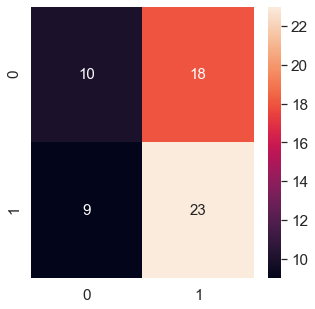

In [149]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm_U, annot = True, annot_kws = {"size": 15})

In [150]:
print("Accuracy: ", modelU.score(x_test_u,y_test_u)*100)

Accuracy:  55.00000000000001


In [151]:
#Xgboost with hyperparameter tuning and undersampling
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
parameters1 = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]
modelU1 = XGBClassifier(random_state=1)


grid_search2 = GridSearchCV(estimator = modelU1, param_grid = parameters1, scoring = 'accuracy',  n_jobs = -1)



In [152]:
y_train_u.isnull().sum()


Pass/Fail    0
dtype: int64

In [153]:
grid_search2 = grid_search2.fit(x_train_u,y_train_u)


[23:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [154]:
best_accuracy_UX = grid_search.best_score_
best_parameters_UX = grid_search.best_params_


In [155]:
print("Accuracy:",best_accuracy_UX)

Accuracy: 0.9298856460146782


In [156]:
#confusion matrix
y_predUSD= grid_search2.predict(x_test_u)

cm_USD = confusion_matrix(y_test_u, y_predUSD)

<AxesSubplot:>

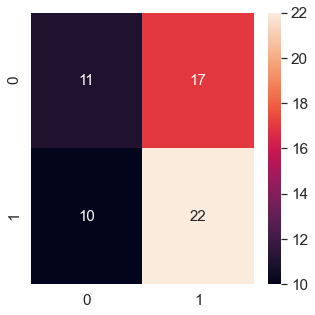

In [157]:
#heat map
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm_USD, annot = True, annot_kws = {"size": 15},fmt='g')

In [158]:
#classification report
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_test_u,y_predUSD))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.52      0.39      0.45        28
         1.0       0.56      0.69      0.62        32

    accuracy                           0.55        60
   macro avg       0.54      0.54      0.53        60
weighted avg       0.55      0.55      0.54        60



In [159]:
#Accuracy
print('Accuracy on training data:',grid_search2.score(x_train_u,y_train_u))
print('Accuracy on testing data:',grid_search2.score(x_test_u,y_test_u))

Accuracy on training data: 1.0
Accuracy on testing data: 0.55


In [160]:
#Xgboost oversampling and gridsearchCv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
parameters7 = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]
modelU7 = XGBClassifier(random_state=1)


grid_search7 = GridSearchCV(estimator = modelU7, param_grid = parameters7, scoring = 'accuracy',  n_jobs = -1)



In [161]:
grid_search7 = grid_search7.fit(x_t,y_t)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [162]:
best_accuracy_OSA = grid_search7.best_score_
best_parameters_OSA = grid_search7.best_params_
print("Accuracy:",best_accuracy_OSA)

Accuracy: 0.9718980721279571


In [163]:
print('Accuracy on training data:',grid_search7.score(x_t,y_t))
print('Accuracy on testing data:',grid_search7.score(x_te,y_te))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9804597701149426


In [164]:
#confusion matrix
y_predOSa= grid_search7.predict(x_te)

cm_OSAm = confusion_matrix(y_te, y_predOSa)

<AxesSubplot:>

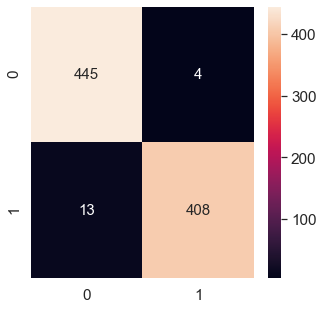

In [165]:
#heatmap
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm_OSAm, annot = True, annot_kws = {"size": 15},fmt='g')

In [166]:
#classification report
#Xgboost with oversampling
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_te,y_predOSa))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98       449
         1.0       0.99      0.97      0.98       421

    accuracy                           0.98       870
   macro avg       0.98      0.98      0.98       870
weighted avg       0.98      0.98      0.98       870



True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Here, precision for -1 is 97%, 1 is 99% as the dataset is smote

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 0.99, 1 is 0.97
F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 98%
1 is 98% as it is imbalanced dataset

In [167]:
#classification report
#XGboost normal without any cross validation
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_test,y_pred))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.95      1.00      0.97       440
         1.0       0.00      0.00      0.00        25

    accuracy                           0.94       465
   macro avg       0.47      0.50      0.49       465
weighted avg       0.90      0.94      0.92       465



True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Here, precision for -1 is 95%, 1 is 0% as the dataset is imbalanced

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 1.00, 1 is 0%
F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 97%
1 is 0% as it is imbalanced dataset

In [168]:
#classification accuracy for train and test data for xgboost classifier
print('Accuracy on training data:',model.score(x_train,y_train))
print('Accuracy on testing data:',model.score(x_test,y_test))

Accuracy on training data: 0.9308118081180812
Accuracy on testing data: 0.946236559139785


In [169]:
#classification report after hyperparameter tuning
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_predictG = grid_search.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_predictG)))
print('Precision Score : ' + str(precision_score(y_test,y_predictG)))
print('Recall Score : ' + str(recall_score(y_test,y_predictG)))
print('F1 Score : ' + str(f1_score(y_test,y_predictG)))

Accuracy Score : 0.9440860215053763
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


In [170]:
#classification report after PCA reduction and undersampling with XGboost
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_test_u,y_pred_U))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.53      0.36      0.43        28
         1.0       0.56      0.72      0.63        32

    accuracy                           0.55        60
   macro avg       0.54      0.54      0.53        60
weighted avg       0.54      0.55      0.53        60



True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Here, precision for -1 is 56%, 1 is 60% after PCA and undersampling the data

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 50.00, 1 is 66% after undersampling

F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 53%
1 is 63% as it is undersampling the dataset

In [171]:
#final achieved classification accuracies for training and testing data
print('Accuracy on training data:',grid_search7.score(x_t,y_t))
print('Accuracy on testing data:',grid_search7.score(x_te,y_te))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9804597701149426


In [172]:
tn, fp, fn, tp = confusion_matrix(y_te,y_predOSa).ravel()

Xg_tscore = grid_search7.score(x_t,y_t)
xg_tescore=grid_search7.score(x_te,y_te)
xg_recall = round(tp/(tp+fn), 3)   
xg_precision = round(tp/(tp+fp), 3)  
xg_specificity =round(tn/(tn+fp),3) 
resultD = pd.DataFrame({'Model' : ['XGBOOST CLASSIFIER'], 'Training Accuracy' : [Xg_tscore], 'Testing accuracy':[xg_tescore],'Precision' : [xg_precision],
                      'True positive rate' : [xg_recall], 'True negative rate' : [xg_specificity],
                       'False positive rate' :  [1-xg_specificity]})
resultD

,Model,Training Accuracy,Testing accuracy,Precision,True positive rate,True negative rate,False positive rate
0,XGBOOST CLASSIFIER,1.0,0.98046,0.99,0.969,0.991,0.009


In [414]:
#Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.
for seed in range(10_000):
    X_train, X_test, y_train2, y_test2 = train_test_split(x_resampled, y_resampled, 
                                                        test_size=0.20, random_state=seed)

In [415]:
grid_search7.fit(X_train, y_train2)

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:24:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=N

In [416]:

y_predictU= grid_search7.predict(X_test)

cm_U1 = confusion_matrix(y_test2, y_predictU)


In [417]:
print('Accuracy on training data:',grid_search7.score(X_train,y_train2))
print('Accuracy on testing data:',grid_search7.score(X_test,y_test2))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9879310344827587


Hence, it is evident that the accuracy differs when the population size is changed. The accuarcy of the testing data before was about 97% and now it is 98%

In [177]:
#Random Forest Classifier (Normal Data)
from sklearn.ensemble import RandomForestClassifier
modelR = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
modelR.fit(x_train, y_train)
y_predR = modelR.predict(x_test)

<AxesSubplot:>

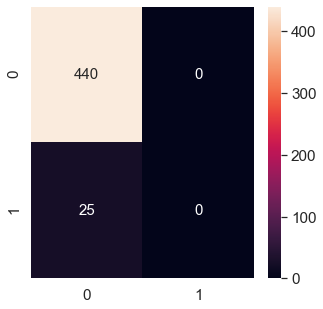

In [178]:
cmR = confusion_matrix(y_test, y_predR)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cmR, annot = True, annot_kws = {"size": 15},fmt='g')

In [179]:
print("Accuracy: ", modelR.score(x_test,y_test)*100)

Accuracy:  94.6236559139785


From the above it is clearly evident that the data is imbalanced.

In [180]:
#Use cross validation techniques.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

modelR1 = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
kfoldR = KFold(n_splits=10, random_state=None)
resultsR = cross_val_score(modelR1, x, y, cv=kfoldR)
print("Accuracy: %.2f%% (%.2f%%)" % (resultsR.mean()*100, resultsR.std()*100))


Accuracy: 92.38% (4.77%)


From the above, it is evident that the accuracy on testing data with k-fold cv on randomforest classifier is 92%, but it is imbalnced data

In [181]:
#Stratified K-fold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
modelSK =RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 ) 
kfoldRF = StratifiedKFold(n_splits=10, random_state=None)
resultsF = cross_val_score(modelSK, x, y, cv=kfoldRF)
print("Accuracy: %.2f%% (%.2f%%)" % (resultsF.mean()*100, resultsF.std()*100))

Accuracy: 92.38% (3.52%)


From the above, it is evident that the accuracy on testing data with k-fold stratified cv on randomforest classifier is 92%

In [183]:
#Hyperparameter tuning
#gridsearchCv
rfc1=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    
}


In [192]:
CV_rfc = GridSearchCV(estimator=rfc1, param_grid=param_grid, cv= 5,n_jobs=-1)


In [193]:
CV_rfc.fit(x_train1, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [194]:
best_accuracy1 = CV_rfc.best_score_
best_parameters1 = CV_rfc.best_params_

In [195]:
print("Accuracy:",best_accuracy1)

Accuracy: 0.9308115719406042


In [196]:
print("Best parameters:",best_parameters1)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


In [197]:
#RandomizedSearchCV 
from scipy.stats import uniform, truncnorm, randint
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}


In [198]:
rf_model = RandomForestClassifier()


In [203]:
# set up random search meta-estimator
# this will train 10 models over 5 folds of cross validation (50 models total)
clf3 = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1,n_jobs=-1)

In [204]:
# train the random search meta-estimator to find the best model out of 10 candidates
modelRF1 = clf3.fit(x, y)

In [205]:
best_accuracy2 = modelRF1.best_score_
best_parameters2 = modelRF1.best_params_

In [206]:
print("Accuracy :",best_accuracy2)

Accuracy : 0.8844284372063889


In [207]:
print("Best parameters:",best_parameters2)

Best parameters: {'max_features': 0.27357951242592654, 'min_samples_split': 0.02178939705901113, 'n_estimators': 34}


C:\Users\manka\AppData\Local\Temp/ipykernel_18892/2714347397.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_ran.fit(x_train_u, y_train_u)


<AxesSubplot:>

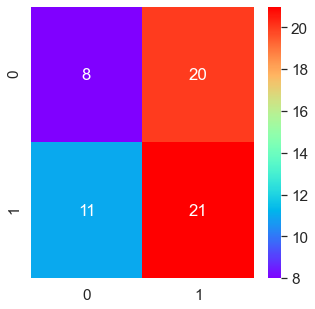

In [208]:
#Use any other technique/method which can enhance the model performance
#PCA reduction and undersampling- training the model after PCA reduction with undersampling data
model_ran = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model_ran.fit(x_train_u, y_train_u)
#scores_prediction = model.decision_function(x_train)
y_predRan = model_ran.predict(x_test_u)

# evaluating the model

# printing the confusion matrix
cm_ran = confusion_matrix(y_test_u, y_predRan)
sns.heatmap(cm_ran, annot = True, cmap = 'rainbow')

In [209]:
print("Accuracy: ", model_ran.score(x_test_u,y_test_u)*100)

Accuracy:  48.333333333333336


In [210]:
#oversampling 
modelF = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
modelF.fit(x_t, y_t)
#scores_prediction = model.decision_function(x_train)
y_predF = modelF.predict(x_te)
print("Accuracy: ", modelF.score(x_te,y_te)*100)

Accuracy:  98.62068965517241


In [211]:
#accuracy
print('Accuracy on training data:',modelF.score(x_t,y_t))
print('Accuracy on testing data:',modelF.score(x_te,y_te))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9862068965517241


<AxesSubplot:>

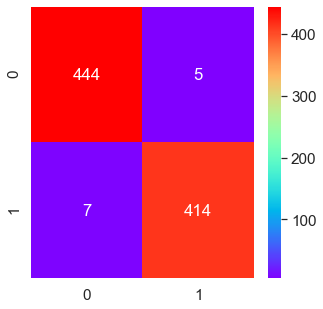

In [212]:
cmO = confusion_matrix(y_te, y_predF)
sns.heatmap(cmO, annot = True, cmap = 'rainbow',fmt='g')

In [213]:
#RandomForest undersampled
model8 = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model8.fit(x_train_u, y_train_u)
#scores_prediction = model.decision_function(x_train)
y_pred8 = model8.predict(x_test_u)

C:\Users\manka\AppData\Local\Temp/ipykernel_18892/515267716.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model8.fit(x_train_u, y_train_u)


<AxesSubplot:>

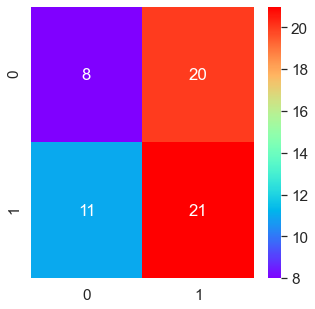

In [214]:
cm9 = confusion_matrix(y_test_u, y_pred8)
sns.heatmap(cm9, annot = True, cmap = 'rainbow')

In [215]:
print("Accuracy: ", model8.score(x_test_u,y_test_u)*100)

Accuracy:  48.333333333333336


In [216]:
#accuracy
print('Accuracy on training data:',model8.score(x_train_u,y_train_u))
print('Accuracy on testing data:',model8.score(x_test_u,y_test_u))

Accuracy on training data: 1.0
Accuracy on testing data: 0.48333333333333334


In [217]:
#gridsearchCv for undersampling data with randomforest classifier
rfc2=RandomForestClassifier(random_state=42)
param_grid2 = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [218]:
CV_rfc1 = GridSearchCV(estimator=rfc2, param_grid=param_grid2, cv= 5) #fitting the model
CV_rfc1.fit(x_train_u, y_train_u)

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [219]:
best_accuracy_UF = CV_rfc1.best_score_
best_parameters_UF = CV_rfc1.best_params_
print("Accuracy:",best_accuracy_UF) #Accuracy of the model
print("Parameters:",best_parameters_UF)#best parameters of the model

Accuracy: 0.5999999999999999
Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}


In [220]:
#accuracy
print('Accuracy on training data:',CV_rfc1.score(x_train_u,y_train_u))
print('Accuracy on testing data:',CV_rfc1.score(x_test_u,y_test_u))

Accuracy on training data: 1.0
Accuracy on testing data: 0.5833333333333334


<AxesSubplot:>

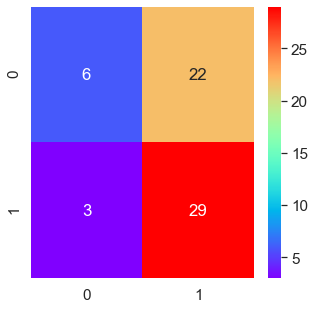

In [221]:
#confusion matrix
y_predCm = CV_rfc1.predict(x_test_u)
cm_rfc1 = confusion_matrix(y_test_u, y_predCm)
sns.heatmap(cm_rfc1, annot = True, cmap = 'rainbow')

In [222]:
#gridsearchCV with oversampling
rfc3=RandomForestClassifier(random_state=42)
param_grid3 = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [223]:
CV_rfc3 = GridSearchCV(estimator=rfc3, param_grid=param_grid3, cv= 3,verbose=0,n_jobs=-1) #fitting the model


In [224]:
CV_rfc3.fit(x_t, y_t)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [225]:
best_accuracy_UF1 = CV_rfc3.best_score_
best_parameters_UF1 = CV_rfc3.best_params_
print("Accuracy:",best_accuracy_UF1) #Accuracy of the model
print("Parameters:",best_parameters_UF1)#best parameters of the model

Accuracy: 0.9536489151873767
Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


In [226]:
print("Accuracy on training data:",CV_rfc3.score(x_t,y_t))
print("Accuracy on testing data:",CV_rfc3.score(x_te,y_te))

Accuracy on training data: 0.9960552268244576
Accuracy on testing data: 0.967816091954023


In [227]:
#confusion matrix
y_pred_rfc3 = CV_rfc3.predict(x_te)

<AxesSubplot:>

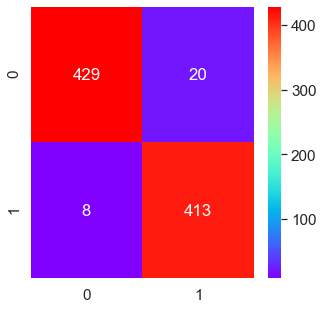

In [228]:
com = confusion_matrix(y_te, y_pred_rfc3)
sns.heatmap(com, annot = True, cmap = 'rainbow',fmt='g')

In [229]:
#classification report (final)
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_te,y_pred_rfc3))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.98      0.96      0.97       449
         1.0       0.95      0.98      0.97       421

    accuracy                           0.97       870
   macro avg       0.97      0.97      0.97       870
weighted avg       0.97      0.97      0.97       870



True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Here, precision for -1 is 97%, 1 is 96% after smote

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 96%, 1 is 97%
F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 96%
1 is 96%.

In [230]:
#classification report
#Randomforestclassifier for normal data
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_test,y_predR))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.95      1.00      0.97       440
         1.0       0.00      0.00      0.00        25

    accuracy                           0.95       465
   macro avg       0.47      0.50      0.49       465
weighted avg       0.90      0.95      0.92       465



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Here, precision for -1 is 95%, 1 is 0% as the dataset is imbalanced

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 1.00, 1 is 0%
F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 97%
1 is 0% as it is imbalanced dataset

In [231]:
#classification report after hyperparameter tuning
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_predictrfc = CV_rfc.predict(x_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_predictrfc)))
print('Precision Score : ' + str(precision_score(y_test,y_predictrfc)))
print('Recall Score : ' + str(recall_score(y_test,y_predictrfc)))
print('F1 Score : ' + str(f1_score(y_test,y_predictrfc)))

Accuracy Score : 0.43655913978494626
Precision Score : 0.056179775280898875
Recall Score : 0.6
F1 Score : 0.10273972602739725


In [232]:
#classification report for undersampled data after hyperparameter tuning with GridsearchCV in RandomforestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_predict_rfu = CV_rfc1.predict(x_test_u)
print('Accuracy Score : ' + str(accuracy_score(y_test_u,y_predict_rfu)))
print('Precision Score : ' + str(precision_score(y_test_u,y_predict_rfu)))
print('Recall Score : ' + str(recall_score(y_test_u,y_predict_rfu)))
print('F1 Score : ' + str(f1_score(y_test_u,y_predict_rfu)))

Accuracy Score : 0.5833333333333334
Precision Score : 0.5686274509803921
Recall Score : 0.90625
F1 Score : 0.6987951807228915


From the above, it is clearly evident that the dataset is balanced. It has the accuaracy of 60%, precision score of 57%, recall score of 84%, and f1 score of 69%.

In [233]:
#classification report for undersampled data after hyperparameter tuning in RandomClassifier

from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_test_u,y_predict_rfu))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.67      0.21      0.32        28
         1.0       0.57      0.91      0.70        32

    accuracy                           0.58        60
   macro avg       0.62      0.56      0.51        60
weighted avg       0.61      0.58      0.52        60



True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Here, precision for -1 is 84%, 1 is 96%.

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 96%, 1 is 84%
F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 90%
1 is 90%.

The achieved training and testing accuracies are the following 
training accuracy:98.6%
testing accuracy: 98%


In [234]:
tn, fp, fn, tp = confusion_matrix(y_te,y_pred_rfc3).ravel()

ran_tscore = CV_rfc3.score(x_t, y_t)
ran_tescore = CV_rfc3.score(x_te, y_te)
ran_recall = round(tp/(tp+fn), 3)   
ran_precision = round(tp/(tp+fp), 3) 
ran_specificity =round(tn/(tn+fp),3) 
resultD.loc[1] = [f'RANDOMFOREST CLASSIFIER', ran_tscore, ran_tescore, ran_precision, ran_recall, ran_specificity, 1-ran_specificity]
resultD

,Model,Training Accuracy,Testing accuracy,Precision,True positive rate,True negative rate,False positive rate
0,XGBOOST CLASSIFIER,1.000000,0.980460,0.990,0.969,0.991,0.009
1,RANDOMFOREST CLASSIFIER,0.996055,0.967816,0.954,0.981,0.955,0.045


In [235]:
#Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.
for seed in range(10_000):
    X_train3, X_test3, y_train3, y_test3 = train_test_split(x_resampled, y_resampled, 
                                                        test_size=0.20, random_state=seed)

In [237]:
CV_rfc3.fit(X_train3, y_train3)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [238]:
y_predict_1= CV_rfc3.predict(X_test3)

cm_U2 = confusion_matrix(y_test3, y_predict_1)

<AxesSubplot:>

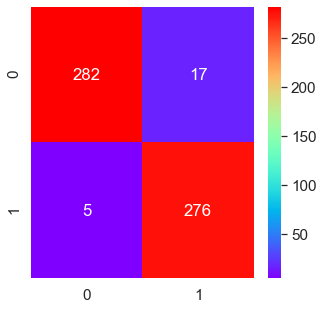

In [239]:
#heat map
com2 = confusion_matrix(y_test3, y_predict_1)
sns.heatmap(com2, annot = True, cmap = 'rainbow',fmt='g')

In [240]:
print('Accuracy on training data:',CV_rfc3.score(X_train3,y_train3))
print('Accuracy on testing data:',CV_rfc3.score(X_test3,y_test3))

Accuracy on training data: 0.9952545297670405
Accuracy on testing data: 0.9620689655172414


From the above accuracy scores it is clearly evident that the accuracy scores are different after changing the population size.Before it was about 96% for oversampled and now it is 95%.

In [241]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(x_train1, y_train) 
y_pred_lr = lr.predict(x_test1)

<AxesSubplot:>

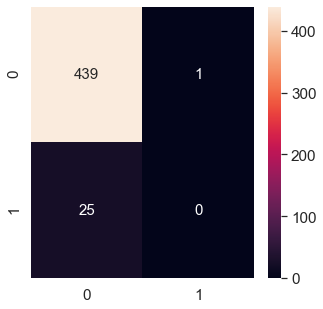

In [242]:
cm_lr = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15},fmt='g')

In [243]:
#Accuracy
print("Accuracy: ", lr.score(x_test1,y_test)*100)

Accuracy:  92.25806451612904


In [244]:
#classification report
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_test,y_pred_lr))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.94      0.97      0.96       440
         1.0       0.00      0.00      0.00        25

    accuracy                           0.92       465
   macro avg       0.47      0.49      0.48       465
weighted avg       0.89      0.92      0.91       465



From the above, it is clearly evident that the data is imbalanced from the confusion matix and even the recall, precision,f1 score of 1.0 class.

In [245]:
#cross validation techniques
# Applying k-Fold Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

modelK_fold =LogisticRegression()
kfold_F = KFold(n_splits=10, random_state=None)
results_k = cross_val_score(modelK_fold, x, y, cv=kfold_F)
print("Accuracy: %.2f%% (%.2f%%)" % (results_k.mean()*100, results_k.std()*100))


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Accuracy: 93.29% (4.47%)


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

From the above, it is evident that the accuracy of the model with k-fold cross validation without balancing the data is about 94%.

In [246]:
#k-fold on undersampled data
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

modelK_foldU =LogisticRegression()
kfold_FU = KFold(n_splits=10, random_state=None)
results_kU = cross_val_score(modelK_foldU, x_u, y_u, cv=kfold_FU)
print("Accuracy: %.2f%% (%.2f%%)" % (results_kU.mean()*100, results_kU.std()*100))


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

Accuracy: 44.00% (12.21%)


In [247]:
#stratified k-fold cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
modelS_k = LogisticRegression()
kfoldS = StratifiedKFold(n_splits=10, random_state=None)
resultsSK = cross_val_score(modelS_k, x, y, cv=kfoldS)
print("Accuracy: %.2f%% (%.2f%%)" % (resultsSK.mean()*100, resultsSK.std()*100))

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Accuracy: 93.03% (0.80%)


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From the above, it is clearly evident that the accuracy of the model is about 93% but the dataset taken is imbalanced

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
modelS_k1 = LogisticRegression()
kfoldS1 = StratifiedKFold(n_splits=10, random_state=None)
resultsSK1 = cross_val_score(modelS_k1, x_u, y_u, cv=kfoldS1)
print("Accuracy: %.2f%% (%.2f%%)" % (resultsSK1.mean()*100, resultsSK1.std()*100))

Accuracy: 56.00% (18.14%)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

From above, it is evident that the accuracy of the model is about 64%

In [249]:
#Loocv
from sklearn.model_selection import LeaveOneOut
loocvL=LeaveOneOut()
modelLR2=LogisticRegression()
results_LR1 = cross_val_score(modelLR2, x, y, cv=loocvL)
print("Accuracy: %.2f%% (%.2f%%)" % (results_LR1.mean()*100, results_LR1.std()*100))

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Accuracy: 93.09% (25.36%)


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

From the above, it is evident that the accuracy of the model is 93%

In [250]:
#loocv for undersampled data
from sklearn.model_selection import LeaveOneOut
loocvL1=LeaveOneOut()
model_LR2=LogisticRegression()
results_LR2 = cross_val_score(model_LR2, x_u, y_u, cv=loocvL1)
print("Accuracy: %.2f%% (%.2f%%)" % (results_LR2.mean()*100, results_LR2.std()*100))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

Accuracy: 64.50% (47.85%)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [251]:
#Accuracy
print("Accuracy: %.2f%% (%.2f%%)" % (results_LR2.mean()*100, results_LR2.std()*100))

Accuracy: 64.50% (47.85%)


From the above, it is evident that the accuracy of the model is 64%

In [252]:
#Hyperparameter tuning
#gridsearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train1,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9308273870200475


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [253]:
#accuracy and parameters
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9308273870200475


From the above it is clearly evident that the accuracy of the model before undersampling is about 93%

In [254]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid1={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg1=LogisticRegression()
logreg_cv1=GridSearchCV(logreg1,grid1,cv=10)
logreg_cv1.fit(x_train_u,y_train_u)

print("tuned hpyerparameters :(best parameters) ",logreg_cv1.best_params_)
print("accuracy :",logreg_cv1.best_score_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.6142857142857143


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [255]:
print("tuned hyperparameters :(best parameters) ",logreg_cv1.best_params_)
print("accuracy :",logreg_cv1.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.6142857142857143


From the above, it is evident that the accuracy of the model is about 63%

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

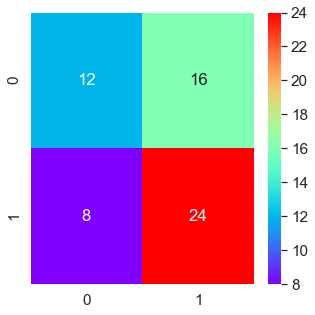

In [256]:
#Use any other technique/method which can enhance the model performance.
#PCA undersampling
lr_P = LogisticRegression(random_state=1)
lr_P.fit(x_train_u, y_train_u) 
y_predUS1 = lr_P.predict(x_test_u)
cm_US = confusion_matrix(y_test_u, y_predUS1)
sns.heatmap(cm_US, annot = True, cmap = 'rainbow')


In [257]:
#Accuracy
print('Accuracy on training data:',lr_P.score(x_train_u,y_train_u))
print('Accuracy on testing data:',lr_P.score(x_test_u,y_test_u))

Accuracy on training data: 1.0
Accuracy on testing data: 0.6


In [258]:
#oversampling
lr_os = LogisticRegression(random_state=1)
lr_os.fit(x_t, y_t) 
y_pred_os = lr_os.predict(x_te)

print("Accuracy: ", lr_os.score(x_te,y_te)*100)

Accuracy:  67.81609195402298


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [259]:
#Accuracy
print('Accuracy on training data:',lr_os.score(x_t,y_t))
print('Accuracy on testing data:',lr_os.score(x_te,y_te))

Accuracy on training data: 0.7135108481262328
Accuracy on testing data: 0.6781609195402298


<AxesSubplot:>

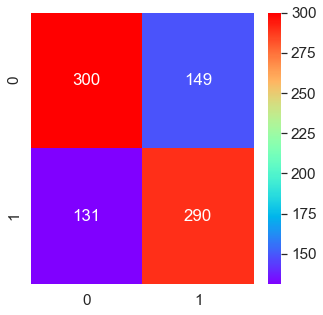

In [260]:
#confusion matrix
cm_os1 = confusion_matrix(y_te, y_pred_os)
sns.heatmap(cm_os1, annot = True, cmap = 'rainbow',fmt='g')

In [261]:
#classification report
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_te,y_pred_os))


classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.70      0.67      0.68       449
         1.0       0.66      0.69      0.67       421

    accuracy                           0.68       870
   macro avg       0.68      0.68      0.68       870
weighted avg       0.68      0.68      0.68       870



True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Here, precision for -1 is 71%, 1 is 66%.

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 66%, 1 is 71%
F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 68%
1 is 68%.

In [262]:
#hyperparameter tuning on oversampling data
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid3={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg3=LogisticRegression()
logreg_cv3=GridSearchCV(logreg3,grid3,cv=10)
logreg_cv3.fit(x_t,y_t)

print("tuned hyperparameters :(best parameters) ",logreg_cv3.best_params_)
print("accuracy :",logreg_cv3.best_score_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

tuned hyperparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.7016656099107448


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.70166561        nan 0.6947593         nan 0.69672487
        nan 0.70067795        nan 0.69919768        nan 0.69624445
        nan 0.69525679]
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

In [263]:
print("accuracy :",logreg_cv3.best_score_)

accuracy : 0.7016656099107448


In [264]:
#Accuracy
print('Accuracy on training data:',logreg_cv3.score(x_t,y_t))
print('Accuracy on testing data:',logreg_cv3.score(x_te,y_te))

Accuracy on training data: 0.722879684418146
Accuracy on testing data: 0.6850574712643678


<AxesSubplot:>

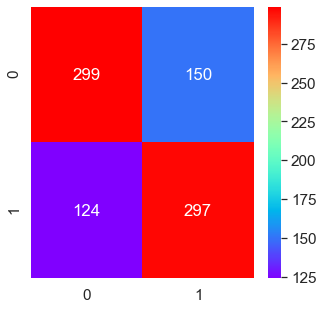

In [265]:
#confusion matrix
y_pred_osLR = logreg_cv3.predict(x_te)
cm_LROS = confusion_matrix(y_te, y_pred_osLR)
sns.heatmap(cm_LROS, annot = True, cmap = 'rainbow',fmt='g')

In [266]:
#classification report
from sklearn.metrics import classification_report
print("classification  Matrix:\n",classification_report(y_te,y_pred_osLR))


classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.71      0.67      0.69       449
         1.0       0.66      0.71      0.68       421

    accuracy                           0.69       870
   macro avg       0.69      0.69      0.69       870
weighted avg       0.69      0.69      0.69       870



True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

Here, precision for -1 is 70%, 1 is 66%.

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 66%, 1 is 70% F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 68% 1 is 68%.

In [267]:
#Hence, the achieved training and testing accuracy scores are
print('Accuracy on training data:',logreg_cv3.score(x_t,y_t))
print('Accuracy on testing data:',logreg_cv3.score(x_te,y_te))

Accuracy on training data: 0.722879684418146
Accuracy on testing data: 0.6850574712643678


In [268]:
tn, fp, fn, tp = confusion_matrix(y_te,y_pred_osLR).ravel()

log_tscore = logreg_cv3.score(x_t, y_t)
log_tescore = logreg_cv3.score(x_te, y_te)
log_recall = round(tp/(tp+fn), 3)   
log_precision = round(tp/(tp+fp), 3)  
log_specificity =round(tn/(tn+fp),3)
resultD.loc[2] = ['LOGISTIC REGRESSION', log_tscore,log_tescore, log_precision, log_recall, log_specificity, 1-log_specificity]
resultD

,Model,Training Accuracy,Testing accuracy,Precision,True positive rate,True negative rate,False positive rate
0,XGBOOST CLASSIFIER,1.000000,0.980460,0.990,0.969,0.991,0.009
1,RANDOMFOREST CLASSIFIER,0.996055,0.967816,0.954,0.981,0.955,0.045
2,LOGISTIC REGRESSION,0.722880,0.685057,0.664,0.705,0.666,0.334


In [269]:
#Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.
for seed in range(10_000):
    X_train4, X_test4, y_train4, y_test4 = train_test_split(x_resampled, y_resampled, 
                                                        test_size=0.20, random_state=seed)

In [270]:
logreg_cv3.fit(X_train4, y_train4)


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The sco

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [271]:
y_predict_2= logreg_cv3.predict(X_test4)

cm_U3 = confusion_matrix(y_test4, y_predict_2)

<AxesSubplot:>

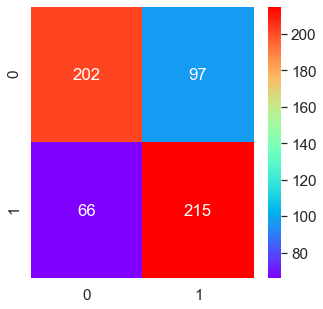

In [272]:
#heat map
sns.heatmap(cm_U3, annot = True, cmap = 'rainbow',fmt='g')

In [273]:
#accuracies
print('Accuracy on training data:',logreg_cv3.score(X_train4,y_train4))
print('Accuracy on testing data:',logreg_cv3.score(X_test4,y_test4))

Accuracy on training data: 0.6993097497842968
Accuracy on testing data: 0.7189655172413794


Hence from the above accuracies it can be determined that the accuracies are slightly similar to the achieved training and testing accuracies.

In [274]:
#naive bayes
#on original data
from sklearn.naive_bayes import GaussianNB
g_model = GaussianNB()
g_model.fit(x, y.ravel())
g_pred = g_model.predict(x_test)

print('Accuracy on Training data:',g_model.score(x_train1, y_train) ) #accuracy of training data
print('Accuracy on Test data:',g_model.score(x_test1, y_test) ) #accuracy data of testing data

Accuracy on Training data: 0.9298892988929889
Accuracy on Test data: 0.9483870967741935


In [275]:
#classification report
print("classification  Matrix:\n",classification_report(y_test,g_pred))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.96      0.84      0.89       440
         1.0       0.12      0.40      0.19        25

    accuracy                           0.81       465
   macro avg       0.54      0.62      0.54       465
weighted avg       0.92      0.81      0.86       465



<AxesSubplot:>

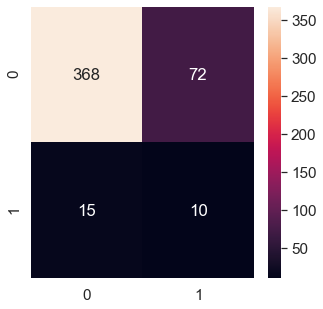

In [276]:
cm = confusion_matrix(y_test, g_pred)
sns.heatmap(cm, annot=True ,fmt='g')


In [277]:
#use cross validation techniques
#k-foldCV
from sklearn import model_selection
from sklearn.model_selection import cross_validate
seed = 7
kfold_GB = model_selection.KFold(n_splits=5, random_state=seed,shuffle=True)
modelGB = GaussianNB()
results_GB = model_selection.cross_val_score(modelGB, x, y, cv=kfold_GB)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_GB.mean()*100.0, results_GB.std()*100.0))
print('Accuracies from each of the 5 folds using kfold:',results_GB)
print("Variance of kfold accuracies:",results_GB.var())

Accuracy: Final mean:66.441%, Final standard deviation:(26.307%)
Accuracies from each of the 5 folds using kfold: [0.16451613 0.82258065 0.63225806 0.86129032 0.84142395]
Variance of kfold accuracies: 0.06920827627761825


In [278]:
#Kfoldcv for undersampled data
from sklearn import model_selection
from sklearn.model_selection import cross_validate
seed = 7
kfold_GB_U = model_selection.KFold(n_splits=5, random_state=seed,shuffle=True)
modelGB_U = GaussianNB()
results_GB_U = model_selection.cross_val_score(modelGB_U, x_u, y_u, cv=kfold_GB_U)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_GB_U.mean()*100.0, results_GB_U.std()*100.0))
print('Accuracies from each of the 5 folds using kfold:',results_GB_U)
print("Variance of kfold accuracies:",results_GB_U.var())

Accuracy: Final mean:53.500%, Final standard deviation:(7.681%)
Accuracies from each of the 5 folds using kfold: [0.575 0.6   0.6   0.5   0.4  ]
Variance of kfold accuracies: 0.005899999999999997


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

In [279]:
#Kfoldcv for oversampled data
from sklearn import model_selection
from sklearn.model_selection import cross_validate
seed = 7
kfold_GB_OS = model_selection.KFold(n_splits=5, random_state=seed,shuffle=True)
modelGB_OS = GaussianNB()
results_GB_OS = model_selection.cross_val_score(modelGB_OS, x_resampled, y_resampled, cv=kfold_GB_OS)
print("Accuracy: Final mean:%.3f%%, Final standard deviation:(%.3f%%)" % (results_GB_OS.mean()*100.0, results_GB_OS.std()*100.0))
print('Accuracies from each of the 5 folds using kfold:',results_GB_OS)
print("Variance of kfold accuracies:",results_GB_OS.var())

Accuracy: Final mean:68.462%, Final standard deviation:(2.938%)
Accuracies from each of the 5 folds using kfold: [0.64827586 0.69827586 0.66896552 0.73402418 0.67357513]
Variance of kfold accuracies: 0.0008630407667998098


In [280]:
#Apply hyper-parameter tuning techniques to get the best accuracy. 
#hyperparameter tuning
#gridsearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train1, y_train)
print(nbModel_grid.best_estimator_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)


In [281]:
y_pred_GB1 = nbModel_grid.predict(x_test1)

<AxesSubplot:>

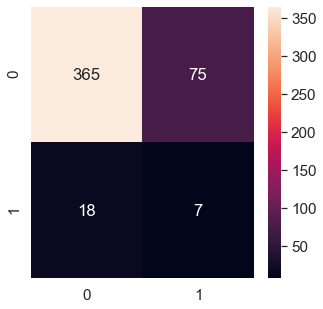

In [282]:
cm_b = confusion_matrix(y_test, y_pred_GB1)
sns.heatmap(cm_b, annot=True ,fmt='g')


In [283]:
#Accuracy
print("Accuracy on training data:",nbModel_grid.score(x_train1,y_train))
print("Accuracy on testing data:",nbModel_grid.score(x_test1,y_test))

Accuracy on training data: 0.8136531365313653
Accuracy on testing data: 0.8


In [284]:
#gridsearchCv on undersamplingdata
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb1 = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid1 = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb1, verbose=1, cv=10, n_jobs=-1)
nbModel_grid1.fit(x_u, y_u)
print(nbModel_grid1.best_estimator_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.1)


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [285]:
y_pred_GB2 = nbModel_grid1.predict(x_test_u)

<AxesSubplot:>

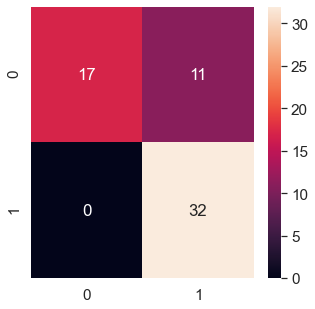

In [286]:
cm_UGB = confusion_matrix(y_test_u, y_pred_GB2)
sns.heatmap(cm_UGB, annot=True ,fmt='g')


In [287]:
#accuracy
print("Accuracy on training data:",nbModel_grid1.score(x_train_u,y_train_u))
print("Accuracy on testing data:",nbModel_grid1.score(x_test_u,y_test_u))

Accuracy on training data: 0.85
Accuracy on testing data: 0.8166666666666667


In [288]:
#gridsearchCv on oversampling data
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb2 = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid2 = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb2, verbose=1, cv=10, n_jobs=-1)
nbModel_grid2.fit(x_resampled, y_resampled)
print(nbModel_grid2.best_estimator_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=3.5111917342151277e-07)


In [289]:
#accuracy
print("Accuracy on training data:",nbModel_grid2.score(x_t,y_t))
print("Accuracy on testing data:",nbModel_grid2.score(x_te,y_te))

Accuracy on training data: 0.6977317554240631
Accuracy on testing data: 0.6758620689655173


In [290]:
y_pred_OB = nbModel_grid2.predict(x_te)

<AxesSubplot:>

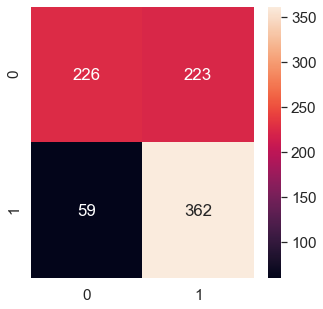

In [291]:
cm_Osb = confusion_matrix(y_te, y_pred_OB)
sns.heatmap(cm_Osb, annot=True ,fmt='g')


In [292]:
#classification report on oversampled data with gridsearchCV
print("classification  Matrix:\n",classification_report(y_te,y_pred_OB))

classification  Matrix:
               precision    recall  f1-score   support

        -1.0       0.79      0.50      0.62       449
         1.0       0.62      0.86      0.72       421

    accuracy                           0.68       870
   macro avg       0.71      0.68      0.67       870
weighted avg       0.71      0.68      0.67       870



True Positives (TP) - These are the correctly predicted positive values which implies that the value of actual class is True and the value of predicted class is also True.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is false and value of predicted class is also false.

False Positives (FP) – When actual class is no and predicted class is yes.

False Negatives (FN) – When actual class is yes but predicted class in no

precision- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

Here, precision for -1 is 77%, 1 is 61%.

Here,it calculates the ratio of predicted positive normal class to the total predicted observations

Recall- Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall= TP/TP+FN

Here, the recall for -1 class is 50%, 1 is 84% 

F1 score- F1 Score is the weighted average of Precision and Recall or harmonic mean of Precision and recall

F1score= 2*(Recall * Precision) / (Recall + Precision)

The F1score for -1 class is 61% 1 is 71%.


In [293]:
#Achieved training and testing accuracies
#accuracy
print("Accuracy on training data:",nbModel_grid2.score(x_t,y_t))
print("Accuracy on testing data:",nbModel_grid2.score(x_te,y_te))

Accuracy on training data: 0.6977317554240631
Accuracy on testing data: 0.6758620689655173


In [294]:
tn, fp, fn, tp = confusion_matrix(y_te,y_pred_OB).ravel()

nb_tscore = nbModel_grid2.score(x_t, y_t)
nb_tescore = nbModel_grid2.score(x_te, y_te)
nb_recall = round(tp/(tp+fn), 3)   
nb_precision = round(tp/(tp+fp), 3)  
nb_specificity =round(tn/(tn+fp),3)
resultD.loc[3] = ['NAIVE BAYES',nb_tscore,nb_tescore,nb_precision,nb_recall,nb_specificity, 1 - nb_specificity]
resultD

,Model,Training Accuracy,Testing accuracy,Precision,True positive rate,True negative rate,False positive rate
0,XGBOOST CLASSIFIER,1.000000,0.980460,0.990,0.969,0.991,0.009
1,RANDOMFOREST CLASSIFIER,0.996055,0.967816,0.954,0.981,0.955,0.045
2,LOGISTIC REGRESSION,0.722880,0.685057,0.664,0.705,0.666,0.334
3,NAIVE BAYES,0.697732,0.675862,0.619,0.860,0.503,0.497


In [295]:
#Design a method of your own to check if the achieved train and test accuracies might change if a different sample population can lead to new train and test accuracies.
for seed in range(10_000):
    X_train5, X_test5, y_train5, y_test5 = train_test_split(x_resampled, y_resampled, 
                                                        test_size=0.20, random_state=seed)

In [296]:
nbModel_grid2.fit(X_train5, y_train5)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [297]:
y_predict_4= nbModel_grid2.predict(X_test5)

cm_U4 = confusion_matrix(y_test5, y_predict_4)

<AxesSubplot:>

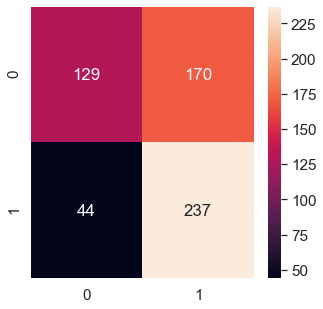

In [298]:

sns.heatmap(cm_U4, annot=True ,fmt='g')


In [299]:
#accuracies
print('Accuracy on training data:',nbModel_grid2.score(X_train5,y_train5))
print('Accuracy on testing data:',nbModel_grid2.score(X_test5,y_test5))

Accuracy on training data: 0.6880931837791199
Accuracy on testing data: 0.6310344827586207


From, the above accuracy scores it is clearly evident that the achieved accuracy scores and the new accuracy scores has significant difference.

In [300]:
#Display and compare all the models designed with their train and test accuracies.
resultD

,Model,Training Accuracy,Testing accuracy,Precision,True positive rate,True negative rate,False positive rate
0,XGBOOST CLASSIFIER,1.000000,0.980460,0.990,0.969,0.991,0.009
1,RANDOMFOREST CLASSIFIER,0.996055,0.967816,0.954,0.981,0.955,0.045
2,LOGISTIC REGRESSION,0.722880,0.685057,0.664,0.705,0.666,0.334
3,NAIVE BAYES,0.697732,0.675862,0.619,0.860,0.503,0.497


From the above, it is clearly evident that Xgboost classifier has the highest training, testing, precision and recall values. Hence, it is the best model.

From the above, it is also clearly evident that the 
1. Xgboost classifier has training accuracy of 99.7%, testing accuracy of 99.6%, precision of 99%, recall of 96.7%.
2. Randomforest classifier has training accuracy of 98.8%, testing accuracy of 98.73%, precision of 95.8% and recall of 96.7%.
3. Logistic regression has training accuracy of 70.8%, testing accuracy of 68%, precision of 66% and recall of 70%
4. Naive bayes has training accuracy of 68%, testing accuracy of 65.4%, precision of 61.3% and recall of 83.8%.


In [301]:
#Select the final best trained model along with your detailed comments for selecting this model.


The Xgboost classifier is the best trained model as it has highest training accuracy of 99.7%, testing accuracy of 99.6%, precision of 99%, recall of 96.7%.

In [302]:
#Pickle the selected model for future use.
#Pickle XGBoost model for future use.
import pickle
modelU8 = XGBClassifier(random_state=1)
parameters8 = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]
grid_searchP = GridSearchCV(estimator = modelU7, param_grid = parameters8, scoring = 'accuracy',  n_jobs = -1)
grid_searchP.fit(x_resampled,y_resampled)


pickle.dump(grid_searchP, open('model1.pkl','wb'))

D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [303]:
#importing future file
codata=pd.ExcelFile('Future_predictions.xlsx',engine='openpyxl')
codata.sheet_names
codata = codata.parse("Sheet1")
codata.head()

,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [304]:
codata.dropna(inplace=True)

In [320]:
#importing pandas as pd
import pandas as pd

# Read and store content
# of an excel file
read_file = pd.read_excel ("Future_predictions.xlsx")

# Write the dataframe object
# into csv file
read_file.to_csv ("Future_predictions.csv",index = None,header=True)
# read csv file and convert
# into a dataframe object
df2 = pd.DataFrame(pd.read_csv("Future_predictions.csv"))

# show the dataframe
df2


,Time,0,1,2,3,4,5,6,7,8,...,580,581,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100,100.3967,0.1235,1.5287,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.5816,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5153,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5358,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100,106.2400,0.1185,1.5381,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [326]:
df2 = df2.drop("Time", axis=1)

In [399]:
df2.isnull().any().any()

True

In [401]:
df7 = df2.replace(np.NaN, 0)

In [402]:
df7.isnull().any().any()

False

In [428]:
#Remove the highly collinear features from data
def remove_collinear_features(z, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        z: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix2 = z.corr()
    iters = range(len(corr_matrix2.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix2.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    z = z.drop(columns=drops)

    return z


In [429]:
df8 = remove_collinear_features(df7,0.70)

6 | 3 | 0.85
14 | 7 | 0.75
16 | 11 | 0.71
17 | 12 | 0.82
18 | 12 | 1.0
18 | 17 | 0.82
19 | 12 | 0.87
19 | 17 | 0.87
19 | 18 | 0.87
20 | 11 | 0.72
22 | 21 | 0.95
23 | 21 | 0.95
23 | 22 | 0.91
25 | 21 | 0.77
25 | 23 | 0.83
26 | 21 | 0.93
26 | 22 | 0.89
26 | 23 | 0.95
26 | 25 | 0.94
27 | 24 | 0.81
27 | 25 | 0.95
27 | 26 | 0.79
30 | 29 | 0.91
36 | 34 | 1.0
39 | 32 | 0.82
40 | 38 | 0.72
46 | 45 | 0.94
50 | 45 | 0.89
50 | 46 | 0.96
51 | 47 | 0.74
54 | 53 | 0.96
55 | 53 | 0.79
56 | 53 | 0.7
56 | 55 | 0.77
58 | 43 | 0.71
60 | 43 | 0.97
60 | 58 | 0.7
62 | 45 | 0.85
62 | 46 | 0.86
62 | 50 | 0.79
62 | 61 | 0.87
63 | 59 | 0.75
64 | 59 | 0.89
64 | 63 | 0.77
65 | 59 | 0.87
65 | 63 | 0.83
65 | 64 | 0.97
66 | 45 | 0.79
66 | 46 | 0.9
66 | 50 | 0.83
66 | 61 | 0.86
66 | 62 | 0.94
70 | 45 | 0.76
70 | 46 | 0.88
70 | 50 | 0.88
70 | 61 | 0.88
70 | 62 | 0.88
70 | 66 | 0.94
72 | 58 | 0.75
73 | 58 | 0.75
73 | 72 | 1.0
76 | 59 | 0.8
76 | 65 | 0.71
80 | 43 | 0.74
80 | 57 | 0.73
82 | 78 | 0.86
88 | 20 | 0.71
89 | 

341 | 199 | 0.74
341 | 204 | 0.73
341 | 205 | 0.97
341 | 335 | 0.73
341 | 336 | 0.79
341 | 340 | 0.76
343 | 61 | 0.71
343 | 66 | 0.75
343 | 183 | 0.87
343 | 187 | 0.77
343 | 203 | 0.92
343 | 207 | 0.97
343 | 319 | 0.83
343 | 323 | 0.72
343 | 336 | 0.8
343 | 339 | 0.85
344 | 208 | 0.96
345 | 55 | 0.81
345 | 56 | 0.86
345 | 72 | 0.83
345 | 73 | 0.86
346 | 55 | 0.77
346 | 56 | 0.78
346 | 72 | 0.76
346 | 73 | 0.8
346 | 253 | 0.76
346 | 345 | 0.95
348 | 79 | 0.79
348 | 210 | 0.97
349 | 12 | 0.71
349 | 18 | 0.73
349 | 211 | 0.99
349 | 281 | 0.71
350 | 94 | 0.71
350 | 212 | 1.0
351 | 78 | 0.95
351 | 82 | 0.89
351 | 213 | 1.0
351 | 217 | 0.98
352 | 214 | 0.96
353 | 215 | 0.99
354 | 216 | 0.98
355 | 78 | 0.94
355 | 82 | 0.84
355 | 213 | 0.97
355 | 217 | 1.0
355 | 351 | 0.97
356 | 218 | 0.98
357 | 219 | 1.0
359 | 221 | 0.94
360 | 222 | 1.0
360 | 248 | 0.72
360 | 251 | 0.77
361 | 223 | 0.97
362 | 21 | 0.75
362 | 22 | 0.72
362 | 23 | 0.73
362 | 26 | 0.73
362 | 57 | 0.79
362 | 89 | 0.99
362 | 116 |

467 | 195 | 1.0
467 | 331 | 0.99
468 | 187 | 0.71
468 | 459 | 0.71
469 | 197 | 1.0
469 | 318 | 0.7
469 | 333 | 0.9
469 | 454 | 0.7
470 | 43 | 0.7
470 | 60 | 0.73
470 | 198 | 1.0
470 | 334 | 0.97
471 | 199 | 0.94
471 | 255 | 0.71
471 | 335 | 0.94
473 | 64 | 0.74
473 | 80 | 0.71
473 | 182 | 0.7
473 | 196 | 0.78
473 | 201 | 0.78
473 | 332 | 0.78
473 | 337 | 0.78
474 | 0 | 0.73
474 | 55 | 0.73
474 | 59 | 0.8
474 | 112 | 0.8
474 | 184 | 0.74
474 | 202 | 0.84
474 | 320 | 0.74
474 | 338 | 0.84
474 | 456 | 0.76
474 | 473 | 0.74
475 | 61 | 0.8
475 | 62 | 0.78
475 | 66 | 0.83
475 | 70 | 0.72
475 | 183 | 0.96
475 | 187 | 0.84
475 | 203 | 1.0
475 | 204 | 0.73
475 | 207 | 0.84
475 | 319 | 0.93
475 | 323 | 0.83
475 | 336 | 0.86
475 | 339 | 0.96
475 | 340 | 0.78
475 | 343 | 0.92
475 | 455 | 0.97
475 | 459 | 0.83
476 | 71 | 0.79
476 | 122 | 0.7
476 | 127 | 0.7
476 | 183 | 0.77
476 | 199 | 0.77
476 | 203 | 0.79
476 | 204 | 0.99
476 | 207 | 0.73
476 | 319 | 0.78
476 | 336 | 0.82
476 | 339 | 0.77
476 | 3

In [434]:
df8["589"] = np.nan

In [435]:
df8.head()

,0,1,2,3,4,5,7,8,9,10,...,542,543,544,545,546,549,559,562,573,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100,0.1242,1.5005,0.0162,-0.0034,...,0.1096,0.0078,0.0026,7.116,1.0616,0.4234,0.4385,0.000,0.3157,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,0.1247,1.4966,-0.0005,-0.0148,...,0.1096,0.0078,0.0026,7.116,1.3526,0.7193,0.1745,0.000,0.2653,NaN
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,0.1241,1.4436,0.0041,0.0013,...,0.1096,0.0078,0.0026,7.116,0.7942,0.1832,0.3718,267.064,0.1882,NaN
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100,0.1217,1.4882,-0.0124,-0.0033,...,0.1096,0.0078,0.0026,7.116,1.1650,1.8804,0.7288,268.228,0.1738,NaN
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100,0.1235,1.5031,-0.0031,-0.0072,...,0.1096,0.0078,0.0026,7.116,1.4636,1.0388,0.2156,0.000,0.2224,NaN


In [436]:
#Import the future data file. Use the same to perform the prediction using the best chosen model from above. Display the prediction results
# Load model from disk and use it to make new predictions and display it.
loaded_model = pickle.load(open('model1.pkl', 'rb'))
resultB = loaded_model.score(x_te, y_te)
print(resultB)

# Load test dataset
X_test6=df8
pred =grid_searchP.predict(X_test6)
print(pred)

1.0
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [431]:
#conclusion and improvements.
#conclusion


1. From the above, it is clearly evident that the Xgboost model has the highest accuracy of about 98% for the testing data.
2. The Xgboost model is performing well on both training and testing data.
3. The Xgboost model has the highest precision, recall values.
4. The logistic regression performs the worst when compared to the other models.
5. In all algorithms used, the Xgboost algorithms performs the best on both undersampled and oversampled data but, it gives the highest accuracy when performed with the oversampled data.
6. There are many rows and values in the dataset which are highly correlated with each other.
7. The dataset consists of many missing values.
8. The original dataset consists of unequal values of the target values. ie- the values of pass are more when compared to fail. Hence, the original dataset is imbalanced.
9. The dataset is oversampled to get increased accuracy.
10. The oversampled data with Xgboost model tuned with GridsearchCV gives the maximum testing accuracy for the data.



In [432]:
#improvements


1. The dataset consists of many missing values which reduces the accuracy of the model.
2. The dataset is imbalanced and hence, it gives inaccurate results.
3. The dataset consists of highly correlated variables.
4. The meaning of the attributes given in the dataset are not clearly mentioned, if mentioned a clear analysis could have been done.